# Datathon II

## Merging the data

In [519]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import re

In [151]:
survey_2015 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2015Surveys_sample.csv", sep = ";")
survey_2016 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2016Surveys_sample.csv", sep = ";")
survey_2017 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2017Surveys_sample.csv", sep = ";")
survey_2018 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2018Surveys_sample.csv", sep = ";")
survey_2019 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2019Surveys_sample.csv", sep = ";")
other_data = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Other_data.csv", sep = ",")

activities = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Activities.xlsx", 'commercial acts')

subjects = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Subject')
course = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Course')
ed_mat = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Educational Material')
support = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Current Support')
languages = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Languages')

coverages = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Coverages.xlsx", 'coverages')
dates = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Dates.xlsx", 'dates')

school = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/School locations.xlsx", 'schools')

In [1042]:
survey_2015.shape

(544725, 9)

In [1050]:
survey_2015['Customer heading'].nunique()

13121

In [1051]:
survey_2016['Customer heading'].nunique()

13143

In [1052]:
survey_2017['Customer heading'].nunique()

13155

In [1053]:
survey_2018['Customer heading'].nunique()

13165

In [1054]:
survey_2019['Customer heading'].nunique()

13111

In [1043]:
survey_2016.shape

(556079, 9)

In [1044]:
survey_2017.shape

(560747, 9)

In [1045]:
survey_2018.shape

(559343, 9)

In [1046]:
survey_2019.shape

(554739, 9)

In [ ]:
marketing_2019 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2019')
marketing_2018 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2018')
marketing_2017 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2017')
marketing_2016 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2016')
marketing_2015 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2015')

In [115]:
pd.set_option('display.max_columns', 100)

In [871]:
sum(survey_2019["Publishing group"] == '1')

68818

In [872]:
sum(survey_2018["Publishing group"] == '1')

82507

In [100]:
survey_2019 = survey_2019.rename(columns={'Educational material': 'Educational Material'})
survey_2015 = survey_2015.rename(columns={'Educational material': 'Educational Material'})

In [101]:
# Stacking everything
survey = pd.concat([survey_2019, survey_2018, survey_2017, survey_2016, survey_2015], ignore_index=True)

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [119]:
survey.head()

,# copies,Course,Customer heading,Educational Material,Language,Publishing group,Subject,Type Current Support,Year
0,18,29,113958.0,3,26,25,53,1,2019
1,18,29,113958.0,3,26,25,65,1,2019
2,18,29,113958.0,1,26,25,60,1,2019
3,18,29,113958.0,1,13,25,54,1,2019
4,27,26,113958.0,1,13,28,48,1,2019


In [873]:
survey_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554739 entries, 0 to 554738
Data columns (total 9 columns):
Year                    554739 non-null int64
Course                  554739 non-null int64
Subject                 554739 non-null int64
Educational material    554739 non-null int64
Language                554739 non-null int64
Type Current Support    554739 non-null int64
# copies                554739 non-null int64
Publishing group        554585 non-null object
Customer heading        552577 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 38.1+ MB


In [141]:
# Removed all nan customers and publishers - not useful for analysis
survey_clean = survey.dropna()

In [154]:
survey_clean.to_csv("Survey.csv", index = False)

In [297]:
survey_clean = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Survey.csv")

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
survey_clean["Publishing group"] = survey_clean["Publishing group"].apply(lambda x: str(x))

In [299]:
survey_clean["Publishing group"] = survey_clean["Publishing group"].astype("category")

In [300]:
survey_clean.head()

,# copies,Course,Customer heading,Educational Material,Language,Publishing group,Subject,Type Current Support,Year
0,18,29,113958.0,3,26,25,53,1,2019
1,18,29,113958.0,3,26,25,65,1,2019
2,18,29,113958.0,1,26,25,60,1,2019
3,18,29,113958.0,1,13,25,54,1,2019
4,27,26,113958.0,1,13,28,48,1,2019


In [880]:
# Filtering out necessary subjects and courses
course_subject = survey_clean[(survey_clean['Subject'] == 13) | (survey_clean['Subject'] == 15) | (survey_clean['Subject'] == 54) | (survey_clean['Subject'] == 60) |
(survey_clean['Subject'] == 65) | (survey_clean['Subject'] == 79)]

In [881]:
school.Region.unique()

array(['País Vasco', 'Castilla la Mancha', 'Comunidad Valenciana',
       'Andalucía', 'Castilla y León', 'Extremadura', 'Islas Baleares',
       nan, 'Cataluña', 'Ceuta', 'Galicia', 'Aragón', 'Islas Canarias',
       'Sin asignar', 'La Rioja', 'Murcia', 'Navarra', 'Asturias',
       'Cantabria', 'Madrid', 'Melilla'], dtype=object)

In [882]:
school.head()

,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
3,113962,42.842855,-2.659526,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
4,113963,42.817684,-2.812399,IRUÑA OKA-IRUÑA DE OCA,Álava,País Vasco,154.0,No,Catholic


In [883]:
# Filtering madrid school
school_madrid = school[(school.Province == 'Madrid') | (school.Province == 'MADRID') | (school.Province == 'Madrid (Comunidad de Madrid)') |
(school.Region == 'Madrid') | (school.Town == 'Madrid') | (school.Town == 'MADRID') ]

### Merging with schools

In [884]:
survey_school = pd.merge(course_subject, school_madrid, how = 'inner', on = 'Customer heading')

In [885]:
survey_school.shape

(154366, 17)

In [886]:
#Filtering out non basic educational materials
survey_school = survey_school[survey_school["Educational Material"] == 1]

In [887]:
survey_school.shape

(131185, 17)

In [889]:
## That's too little!!
sum(survey_school['Publishing group'] == '1')

30920

In [890]:
#Dropping useless columns
survey_school = survey_school.drop(['Region', 'Province', 'Educational Material', 'Language'], axis = 1)

In [891]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 13.1+ MB


### Merging activities and marketing actions

In [ ]:
marketing = pd.concat([marketing_2019, marketing_2018, marketing_2017, marketing_2016, marketing_2015], ignore_index=True)

In [393]:
#marketing.to_csv("marketing_stacked.csv", index = False)

In [406]:
marketing_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215470 entries, 0 to 215469
Data columns (total 6 columns):
Year                207790 non-null float64
Customer heading    207790 non-null object
Day sent            207790 non-null object
# Mkt_action 1      215470 non-null int64
# Mkt_action 2      11790 non-null float64
# Mkt_action 3      29812 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.9+ MB


In [319]:
marketing = pd.read_csv('/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/marketing_stacked.csv')

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [320]:
marketing = marketing[marketing['Year'].notna()]

In [321]:
marketing.Year = marketing.Year.astype('int64')

### Merging marketing with the main set

In [322]:
marketing.head()

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2019,137142,26/06/2019,1.0,NaN,NaN
1,2019,137142,27/05/2019,1.0,NaN,NaN
2,2019,137142,05/06/2019,1.0,NaN,NaN
3,2019,137142,29/05/2019,1.0,NaN,NaN
4,2019,137142,29/05/2019,1.0,NaN,NaN


In [323]:
marketing['a'] = marketing['Customer heading'].str.startswith(("O","H"))

In [324]:
marketing = marketing[marketing['a'] ==False].drop("a", axis = 1)

In [327]:
# Converting to a proper type
survey_school['Customer heading'] = survey_school['Customer heading'].astype('int64').astype('category')
marketing['Customer heading'] = marketing['Customer heading'].astype('int64').astype('category')

In [550]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435538 entries, 0 to 1837538
Data columns (total 6 columns):
Year                1435538 non-null int64
Customer heading    1435538 non-null category
Day sent            1435538 non-null object
# Mkt_action 1      851795 non-null float64
# Mkt_action 2      225577 non-null float64
# Mkt_action 3      249167 non-null float64
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 69.2+ MB


In [107]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26696 entries, 0 to 30767
Data columns (total 18 columns):
Year                    26696 non-null int64
Course                  26696 non-null int64
Subject                 26696 non-null int64
Educational Material    26696 non-null int64
Language                26696 non-null int64
Type Current Support    26696 non-null int64
# copies                26696 non-null int64
Publishing group        26696 non-null category
Customer heading        26696 non-null category
# change copies         26696 non-null float64
Latitude                26696 non-null float64
Longitude               26696 non-null float64
Town                    26696 non-null object
Province                26677 non-null object
Region                  26696 non-null object
Current Seller id       26696 non-null float64
Institution             26696 non-null object
Titularity              26696 non-null object
dtypes: category(2), float64(4), int64(7), object(5)
memory us

In [554]:
marketing.groupby(['Year', 'Customer heading'])['# Mkt_action 1'].count()

Year  Customer heading
2015  113911              24
      113956              57
      113958               8
      113962              65
      113963               9
                          ..
2019  212896               1
      212899               8
      212914              21
      212917               2
      212961               3
Name: # Mkt_action 1, Length: 44165, dtype: int64

In [328]:
marketing_schools = pd.merge(survey_school,marketing, how = 'left', on = ['Year', 'Customer heading'])

In [329]:
marketing_schools.head()

,Year,Course,Subject,Educational Material,Language,Type Current Support,# copies,Publishing group,Customer heading,change copies,...,Town,Province,Region,Current Seller id,Institution,Titularity,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2019,29,65,1,13,1,135,34,136369,90.0,...,MADRID,Madrid,Madrid,208.0,No,Catholic,09/07/2019,0.0,NaN,15.0
1,2019,29,65,1,13,1,135,34,136369,90.0,...,MADRID,Madrid,Madrid,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
2,2019,29,65,1,13,1,135,34,136369,90.0,...,MADRID,Madrid,Madrid,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
3,2019,29,65,1,13,1,135,34,136369,90.0,...,MADRID,Madrid,Madrid,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
4,2019,29,65,1,13,1,135,34,136369,90.0,...,MADRID,Madrid,Madrid,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN


In [330]:
marketing_schools.shape

(630857, 22)

In [331]:
marketing_schools.isna().sum()

Year                         0
Course                       0
Subject                      0
Educational Material         0
Language                     0
Type Current Support         0
# copies                     0
Publishing group             0
Customer heading             0
change copies                0
Latitude                     0
Longitude                    0
Town                         0
Province                    19
Region                       0
Current Seller id            0
Institution                  0
Titularity                   0
Day sent                  3437
# Mkt_action 1            3437
# Mkt_action 2          580081
# Mkt_action 3          500030
dtype: int64

In [499]:
marketing_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 131184
Data columns (total 17 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null int64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
Day sent                0 non-null object
# Mkt_action 1          0 non-null float64
# Mkt_action 2          0 non-null float64
# Mkt_action 3          0 non-null float64
dtypes: category(1), float64(6), int64(6), object(4)
memory usage: 17.1+ MB


In [397]:
survey_school.head()

,# copies,Course,Customer heading,Publishing group,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity
0,135,29,136369.0,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
1,0,29,136369.0,1,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
2,0,29,136369.0,1,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
4,135,29,136369.0,1,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
5,140,30,136369.0,1,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic


In [111]:
survey_school[(survey_school.Course == 26) & (survey_school.Subject == 13)]

,Year,Course,Subject,Educational Material,Language,Type Current Support,# copies,Publishing group,Customer heading,# change copies,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
56,2019,26,13,1,13,1,107,1,136372,99.0,40.372197,-3.760104,MADRID,Madrid,Madrid,208.0,No,Catholic
83,2019,26,13,1,13,1,27,1,136377,21.0,40.603361,-3.712042,TRES CANTOS,Madrid,Madrid,117.0,Yes,Public
109,2019,26,13,1,13,1,52,1,136378,48.0,40.242364,-3.704871,PINTO,Madrid,Madrid,189.0,No,Catholic
143,2019,26,13,1,13,1,50,1,136384,-1.0,40.410260,-3.610935,MADRID,Madrid,Madrid,208.0,No,Catholic
185,2019,26,13,1,13,1,77,34,136387,58.0,40.482684,-3.716683,MADRID,Madrid,Madrid,161.0,No,Catholic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30269,2019,26,13,1,13,1,75,1,210414,19.0,40.242334,-3.695313,PINTO,Madrid,Madrid,157.0,No,Catholic
30465,2019,26,13,1,13,1,25,5,211817,-58.0,40.029670,-3.600509,ARANJUEZ,Madrid,Madrid,157.0,Yes,Private
30644,2019,26,13,1,13,1,55,5,212461,30.0,40.395026,-3.755284,MADRID,Madrid,Madrid,157.0,No,Catholic
30704,2019,26,13,1,13,1,56,6,212529,36.0,40.444196,-3.701910,MADRID,Madrid,Madrid,208.0,No,Catholic


## Create target

In [892]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 13.1+ MB


In [ ]:
publ_1 = survey_school

In [112]:
year = [2015, 2016, 2017, 2018]
# Creating the key
survey_school['key'] = [str(x) + '_' + str(y) + '_' + str(z) for x, y, z in zip(survey_school['Course'], survey_school['Subject'], survey_school['Customer heading'])]

In [1213]:
survey_school.groupby(['key','Year'])['# copies'].sum().unstack()

Year,2015,2016,2017,2018,2019
key,,,,,
26_13_136370.0,NaN,NaN,110.0,0.0,NaN
26_13_136372.0,NaN,116.0,NaN,0.0,107.0
26_13_136377.0,17.0,NaN,24.0,27.0,27.0
26_13_136378.0,NaN,49.0,52.0,NaN,52.0
26_13_136384.0,60.0,49.0,56.0,50.0,50.0
...,...,...,...,...,...
31_79_212625.0,NaN,NaN,NaN,NaN,46.0
31_79_212675.0,30.0,NaN,47.0,47.0,NaN
31_79_212705.0,NaN,16.0,16.0,5.0,NaN


In [114]:
dummy_all = pd.get_dummies(columns = ['Publishing group'], data = survey_school)

In [1397]:
survey_school.to_csv("madrid_survey.csv", index = False)

In [563]:
dummy_all.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_0,Publishing group_1,Publishing group_10,Publishing group_11,Publishing group_12,Publishing group_13,Publishing group_14,Publishing group_15,Publishing group_16,Publishing group_17,Publishing group_18,Publishing group_19,Publishing group_2,Publishing group_20,Publishing group_21,Publishing group_22,Publishing group_23,Publishing group_23_BLA,Publishing group_24,Publishing group_25,Publishing group_26,Publishing group_27,Publishing group_27_DIF,Publishing group_28,Publishing group_29,Publishing group_3,Publishing group_30,Publishing group_31,Publishing group_32,Publishing group_33,Publishing group_34,Publishing group_37_SGL,Publishing group_4,Publishing group_41_MKI,Publishing group_42_DXG,Publishing group_43_JMT,Publishing group_44_PLY,Publishing group_5,Publishing group_6,Publishing group_7,Publishing group_8,Publishing group_9
0,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,29,136369,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,29,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,135,29,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,140,30,136369,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [564]:
dummy_all.columns

Index(['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'Publishing group_0',
       'Publishing group_1', 'Publishing group_10', 'Publishing group_11',
       'Publishing group_12', 'Publishing group_13', 'Publishing group_14',
       'Publishing group_15', 'Publishing group_16', 'Publishing group_17',
       'Publishing group_18', 'Publishing group_19', 'Publishing group_2',
       'Publishing group_20', 'Publishing group_21', 'Publishing group_22',
       'Publishing group_23', 'Publishing group_23_BLA', 'Publishing group_24',
       'Publishing group_25', 'Publishing group_26', 'Publishing group_27',
       'Publishing group_27_DIF', 'Publishing group_28', 'Publishing group_29',
       'Publishing group_3', 'Publishing group_30', 'Publishing group_31',
       'Publishing group_32', 'Publishing group_33', 'Publishing group_34',
       'Publishing group

In [115]:
target_data = dummy_all[['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity',
       'Publishing group_1']]

In [116]:
target_data.head(20)

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1
0,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
1,0,29,136369,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
2,0,29,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
4,135,29,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
5,140,30,136369,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
7,140,26,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
8,140,26,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
9,140,26,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
11,140,30,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
12,140,30,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1


In [1065]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
Publishing group_1      131185 non-null uint8
dtypes: float64(4), int64(5), object(3), uint8(1)
memory usage: 13.1+ MB


In [117]:
# Creating the key
target_data['key'] = [str(x) + '_' + str(y) + '_' + str(z) for x, y, z in zip(target_data['Course'], target_data['Subject'], target_data['Customer heading'])]

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 2019-2018

In [1056]:
target_data.shape

(131185, 13)

In [1093]:
target_data.groupby(['Year', 'Publishing group_1'])['Customer heading'].nunique()

Year  Publishing group_1
2015  0                     1207
      1                      701
2016  0                     1227
      1                      707
2017  0                     1251
      1                      696
2018  0                     1268
      1                      699
2019  0                     1273
      1                      652
Name: Customer heading, dtype: int64

In [1098]:
data_2019 = target_data[(target_data.Year == 2019)]

In [1084]:
data_2019.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
0,135,29,136369.0,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369.0
1,0,29,136369.0,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
2,0,29,136369.0,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
4,135,29,136369.0,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
5,140,30,136369.0,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0


In [1099]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2018 = target_data[(target_data.Year == 2018)& (target_data['Publishing group_1'] == 1)]

In [1086]:
data_2018.shape

(5946, 14)

In [1100]:
data_2019['Publishing group_1'].value_counts()

0    21418
1     5278
Name: Publishing group_1, dtype: int64

In [1134]:
churn_2019_2018 =pd.merge(data_2019, data_2018, how = 'right', on = ['Customer heading','Course','Subject'])

In [1135]:
churn_2019_2018['churn'] = np.where((churn_2019_2018['Publishing group_1_x'] != churn_2019_2018['Publishing group_1_y'])  | (churn_2019_2018['Publishing group_1_x'].isna()),1,0)

In [1136]:
churn_2019_2018.shape

(5946, 26)

In [1137]:
churn_2019_2018['churn'].value_counts()/churn_2019_2018['churn'].shape[0]

0    0.547595
1    0.452405
Name: churn, dtype: float64

In [1138]:
churn_2019_2018.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude_x,Longitude_x,Town_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
0,0.0,29,136369.0,79,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_79_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0,0
1,0.0,29,136369.0,60,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0,0
2,135.0,29,136369.0,54,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_54_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0,0
3,140.0,30,136369.0,15,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_15_136369.0,140,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0,0
4,140.0,26,136369.0,54,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_54_136369.0,0,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0,0


In [1139]:
# Leaving other columns cause they might have changed
sum(churn_2019_2018['# copies_x'] != churn_2019_2018['# copies_y'])

2724

In [1108]:
churn_2019_2018.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13          97
        15         127
        54         204
        60         188
        65          50
        79         172
27      13         104
        15         144
        54         230
        60         196
        65          51
        79         170
28      13         153
        15         183
        54         265
        60         237
        65          45
        79         157
29      13         144
        15         177
        54         256
        60         259
        65          54
        79         150
30      13         149
        15         179
        54         273
        60         264
        65          51
        79         146
31      13         168
        15         167
        54         264
        60         263
        65          52
        79         157
Name: Subject, dtype: int64

# 2018-2017

In [1143]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2018 = target_data[(target_data.Year == 2018)]

In [1144]:
data_2018.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
31,135,29,136369.0,54,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
32,135,29,136369.0,60,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
33,135,29,136369.0,79,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
34,140,30,136369.0,15,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0
36,0,26,136369.0,54,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0


In [1145]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2017 = target_data[(target_data.Year == 2017)& (target_data['Publishing group_1'] == 1)]

In [1146]:
data_2017.shape

(6388, 14)

In [1147]:
data_2017['Publishing group_1'].value_counts()

1    6388
Name: Publishing group_1, dtype: int64

In [1148]:
data_2018['Publishing group_1'].value_counts()

0    20651
1     5946
Name: Publishing group_1, dtype: int64

In [1149]:
churn_2018_2017 =pd.merge(data_2018, data_2017, how = 'right', on = ['Customer heading','Course','Subject'])

In [1150]:
churn_2018_2017['churn'] = np.where((churn_2018_2017['Publishing group_1_x'] != churn_2018_2017['Publishing group_1_y'] )
                                    | (churn_2018_2017['Publishing group_1_x'].isna()),1,0)

In [1151]:
# Churn rates
churn_2018_2017['churn'].value_counts()/churn_2018_2017['churn'].shape[0]

0    0.600344
1    0.399656
Name: churn, dtype: float64

In [1080]:
churn_2018_2017.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,135.0,29,136369.0,54,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_54_136369.0,140,1,2017,1,29_54_136369.0,0
1,135.0,29,136369.0,79,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_79_136369.0,140,1,2017,1,29_79_136369.0,0
2,0.0,26,136369.0,54,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_54_136369.0,140,1,2017,1,26_54_136369.0,0
3,140.0,30,136369.0,60,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,140,1,2017,1,30_60_136369.0,0
4,0.0,26,136369.0,79,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,140,1,2017,1,26_79_136369.0,0


In [1082]:
churn_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6388 entries, 0 to 6387
Data columns (total 20 columns):
# copies_x                4399 non-null float64
Course                    6388 non-null int64
Customer heading          6388 non-null float64
Subject                   6388 non-null int64
Type Current Support_x    4399 non-null float64
Year_x                    4399 non-null float64
Latitude                  6388 non-null float64
Longitude                 6388 non-null float64
Town                      6388 non-null object
Current Seller id         6388 non-null float64
Institution               6388 non-null object
Titularity                6388 non-null object
Publishing group_1_x      4399 non-null float64
key_x                     4399 non-null object
# copies_y                6388 non-null int64
Type Current Support_y    6388 non-null int64
Year_y                    6388 non-null int64
Publishing group_1_y      6388 non-null uint8
key_y                     6388 non-null objec

In [1081]:
churn_2018_2017.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13         112
        15         144
        54         241
        60         207
        65          48
        79         194
27      13         125
        15         149
        54         246
        60         229
        65          49
        79         188
28      13         159
        15         181
        54         292
        60         245
        65          56
        79         177
29      13         156
        15         178
        54         275
        60         258
        65          46
        79         174
30      13         174
        15         192
        54         261
        60         271
        65          53
        79         184
31      13         169
        15         180
        54         274
        60         273
        65          51
        79         177
Name: Subject, dtype: int64

# 2017-2016

In [1152]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2017 = target_data[(target_data.Year == 2017)]

In [1110]:
data_2017.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
56,140,29,136369.0,65,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369.0
57,140,29,136369.0,54,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
59,140,29,136369.0,79,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
61,140,26,136369.0,60,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_60_136369.0
62,140,26,136369.0,54,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0


In [1153]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2016 = target_data[(target_data.Year == 2016)& (target_data['Publishing group_1'] == 1)]

In [1154]:
data_2016.shape

(6693, 14)

In [1155]:
data_2017['Publishing group_1'].value_counts()

0    19868
1     6388
Name: Publishing group_1, dtype: int64

In [1156]:
churn_2017_2016 =pd.merge(data_2017, data_2016, how = 'right', on = ['Customer heading','Course','Subject'])

In [1157]:
churn_2017_2016['churn'] = np.where((churn_2017_2016['Publishing group_1_x'] != churn_2017_2016['Publishing group_1_y'])  | (churn_2017_2016['Publishing group_1_x'].isna()),1,0)

In [1158]:
churn_2017_2016['churn'].value_counts()/churn_2017_2016['churn'].shape[0]

0    0.653519
1    0.346481
Name: churn, dtype: float64

In [1115]:
churn_2017_2016.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,140.0,30,136369.0,54,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_54_136369.0,136,1,2016,1,30_54_136369.0,0
1,140.0,30,136369.0,60,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,136,1,2016,1,30_60_136369.0,0
2,140.0,26,136369.0,79,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,135,1,2016,1,26_79_136369.0,0
3,135.0,27,136369.0,60,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,27_60_136369.0,136,1,2016,1,27_60_136369.0,0
4,139.0,31,136369.0,54,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,31_54_136369.0,147,1,2016,1,31_54_136369.0,0


In [1159]:
churn_2016_2015.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,144.0,29,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,140,1,2015,1,29_60_136369.0,0
1,136.0,30,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,148,1,2015,1,30_60_136369.0,0
2,136.0,30,136369.0,65,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,0.0,30_65_136369.0,148,1,2015,1,30_65_136369.0,1
3,135.0,26,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,0,1,2015,1,26_79_136369.0,0
4,136.0,30,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_79_136369.0,148,1,2015,1,30_79_136369.0,0


# All churn rates

In [1176]:
churn_2019_2018['churn'].value_counts()/churn_2019_2018['churn'].shape[0]

0    0.547595
1    0.452405
Name: churn, dtype: float64

In [1168]:
churn_2018_2017['churn'].value_counts()/churn_2018_2017['churn'].shape[0]

0    0.600344
1    0.399656
Name: churn, dtype: float64

In [1169]:
churn_2017_2016['churn'].value_counts()/churn_2017_2016['churn'].shape[0]

0    0.653519
1    0.346481
Name: churn, dtype: float64

In [1170]:
churn_2016_2015['churn'].value_counts()/churn_2016_2015['churn'].shape[0]

0    0.66581
1    0.33419
Name: churn, dtype: float64

In [1171]:
churn_2017_2016.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13         116
        15         145
        54         248
        60         231
        65          58
        79         195
27      13         133
        15         162
        54         264
        60         229
        65          56
        79         206
28      13         168
        15         180
        54         278
        60         270
        65          59
        79         193
29      13         168
        15         184
        54         283
        60         276
        65          60
        79         189
30      13         180
        15         182
        54         289
        60         279
        65          58
        79         172
31      13         183
        15         216
        54         277
        60         265
        65          56
        79         185
Name: Subject, dtype: int64

#  2016-2015

In [1160]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2016 = target_data[(target_data.Year == 2016)]

In [1161]:
data_2016.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
80,144,29,136369.0,60,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
83,135,26,136369.0,65,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,26_65_136369.0
84,136,30,136369.0,54,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_54_136369.0
85,136,30,136369.0,60,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_60_136369.0
86,136,30,136369.0,65,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,30_65_136369.0


In [1162]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2015 = target_data[(target_data.Year == 2015)& (target_data['Publishing group_1'] == 1)]

In [966]:
data_2016.shape

(26042, 13)

In [911]:
data_2015['Publishing group_1'].value_counts()

1    6615
Name: Publishing group_1, dtype: int64

In [912]:
data_2016['Publishing group_1'].value_counts()

0    19349
1     6693
Name: Publishing group_1, dtype: int64

In [1163]:
churn_2016_2015 =pd.merge(data_2016, data_2015, how = 'right', on = ['Customer heading','Course','Subject'])

In [1164]:
churn_2016_2015['churn'] = np.where((churn_2016_2015['Publishing group_1_x'] != churn_2016_2015['Publishing group_1_y'])  | (churn_2016_2015['Publishing group_1_x'].isna()),1,0)

In [1165]:
churn_2016_2015['churn'].value_counts()/churn_2016_2015['churn'].shape[0]

0    0.66581
1    0.33419
Name: churn, dtype: float64

In [1166]:
churn_2016_2015.shape

(6616, 26)

In [980]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Titularity_x'] != churn_2016_2015['Titularity_y'])

0

In [1125]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['# copies_x'] != churn_2016_2015['# copies_y'])

5772

In [1128]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Type Current Support_x'] != churn_2016_2015['Type Current Support_y'])

2010

In [1129]:
churn_2016_2015.isna().sum()

# copies_x                1989
Course                       0
Customer heading             0
Subject                      0
Type Current Support_x    1989
Year_x                    1989
Latitude                     0
Longitude                    0
Town                         0
Current Seller id            0
Institution                  0
Titularity                   0
Publishing group_1_x      1989
key_x                     1989
# copies_y                   0
Type Current Support_y       0
Year_y                       0
Publishing group_1_y         0
key_y                        0
churn                        0
dtype: int64

In [988]:
4/21

0.19047619047619047

In [956]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Town_y'] != churn_2016_2015['Town_x'])

0

In [961]:
# Leaving other columns cause they might have changed
sum(churn_2017_2016['Institution_y'] != churn_2017_2016['Institution_x'])

0

In [965]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Current Seller id_x'] != churn_2016_2015['Current Seller id_y'])

0

# Stack churn

In [1372]:
stacked_churn = pd.concat([churn_2016_2015, churn_2017_2016, churn_2018_2017, churn_2019_2018], ignore_index = True)

In [1173]:
stacked_churn.groupby(['churn'])['churn'].count()

churn
0    15870
1     9773
Name: churn, dtype: int64

In [1177]:
stacked_churn.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude_x,Longitude_x,Town_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
0,144.0,29,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0,0
1,136.0,30,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_60_136369.0,0
2,136.0,30,136369.0,65,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,0.0,30_65_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_65_136369.0,1
3,135.0,26,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_79_136369.0,0
4,136.0,30,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_79_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_79_136369.0,0


In [1184]:
stacked_churn.columns

Index(['# copies_x', 'Course', 'Customer heading', 'Subject',
       'Type Current Support_x', 'Year_x', 'Latitude_x', 'Longitude_x',
       'Town_x', 'Current Seller id_x', 'Institution_x', 'Titularity_x',
       'Publishing group_1_x', 'key_x', '# copies_y', 'Type Current Support_y',
       'Year_y', 'Latitude_y', 'Longitude_y', 'Town_y', 'Current Seller id_y',
       'Institution_y', 'Titularity_y', 'Publishing group_1_y', 'key_y',
       'churn'],
      dtype='object')

In [1373]:
stacked_churn.isna().sum()

# copies_x                7889
Course                       0
Customer heading             0
Subject                      0
Type Current Support_x    7889
Year_x                    7889
Latitude_x                7889
Longitude_x               7889
Town_x                    7889
Current Seller id_x       7889
Institution_x             7889
Titularity_x              7889
Publishing group_1_x      7889
key_x                     7889
# copies_y                   0
Type Current Support_y       0
Year_y                       0
Latitude_y                   0
Longitude_y                  0
Town_y                       0
Current Seller id_y          0
Institution_y                0
Titularity_y                 0
Publishing group_1_y         0
key_y                        0
churn                        0
dtype: int64

In [1188]:
stacked_churn.shape

(25643, 26)

In [1256]:
final_churn[final_churn['Type Current Support_x'] != final_churn['Type Current Support_y']]

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
369,97.0,30,136485.0,79,2.0,157.0,No,Catholic,1.0,0,1,2015,40.438265,-3.661214,MADRID,157.0,No,Catholic,1,30_79_136485.0,0
869,50.0,31,136817.0,60,2.0,117.0,Yes,Public,1.0,0,1,2015,40.592651,-3.702407,TRES CANTOS,117.0,Yes,Public,1,31_60_136817.0,0
1224,74.0,27,137059.0,60,2.0,131.0,Yes,Public,0.0,0,1,2015,40.300308,-3.829273,FUENLABRADA,131.0,Yes,Public,1,27_60_137059.0,1
1432,27.0,31,137405.0,15,2.0,159.0,Yes,Private,0.0,29,1,2015,40.460591,-3.482539,TORREJON DE ARDOZ,159.0,Yes,Private,1,31_15_137405.0,1
1433,27.0,31,137405.0,13,2.0,159.0,Yes,Private,0.0,29,1,2015,40.460591,-3.482539,TORREJON DE ARDOZ,159.0,Yes,Private,1,31_13_137405.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25638,NaN,28,212705.0,79,NaN,NaN,NaN,NaN,NaN,5,1,2018,40.462455,-3.776128,MADRID,189.0,Yes,Private,1,28_79_212705.0,1
25639,NaN,29,212719.0,54,NaN,NaN,NaN,NaN,NaN,109,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,29_54_212719.0,1
25640,NaN,26,212719.0,54,NaN,NaN,NaN,NaN,NaN,125,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,26_54_212719.0,1
25641,NaN,30,212719.0,54,NaN,NaN,NaN,NaN,NaN,154,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,30_54_212719.0,1


## Imputing missing values

In [1198]:
final_churn.groupby(['Customer heading', 'Course'])['# copies_x'].median()

Customer heading  Course
136369.0          26        137.5
                  27        136.0
                  28        134.0
                  29        135.0
                  30        140.0
                            ...  
212719.0          27        125.0
                  28          0.0
                  29        109.0
                  30        154.0
                  31          NaN
Name: # copies_x, Length: 3826, dtype: float64

In [1381]:
stacked_churn['change_copies'] = stacked_churn['# copies_x'].fillna(0) - stacked_churn['# copies_y'].fillna(0)

In [1382]:
final_churn = stacked_churn.drop(['Year_x','key_x', 'Latitude_x', 'Longitude_x', 'Town_x',
                                 'Type Current Support_x', 'Titularity_x', 'Institution_x', 'Publishing group_1_y', 
                               'Publishing group_1_x','Current Seller id_x', '# copies_x'], axis = 1)

In [1383]:
final_churn = final_churn.rename(columns={'# copies_y': '# copies', 'Year_y': 'Year', 'key_y':'key', 
                                        'Latitude_y': 'Latitude', 'Town_y':'Town',
                                          'Longitude_y': 'Longitude', 'Type Current Support_y': 'Type Current Support',
                                        'Titularity_y': 'Titularity', 'Institution_y': 'Institution',
                                          'Current Seller id_y': 'Current Seller id'
                                         })

In [1385]:
final_churn.shape

(25643, 15)

In [1380]:
final_churn['Year'].isna()

array([2016.,   nan, 2017., 2018., 2019.])

In [1387]:
final_churn['Year'].value_counts()

2016    6693
2015    6616
2017    6388
2018    5946
Name: Year, dtype: int64

In [1390]:
final_churn[final_churn['Year'] == 2018]['Year'] = 2019
final_churn[final_churn['Year'] == 2017]['Year'] = 2018
final_churn[final_churn['Year'] == 2016]['Year'] = 2017
final_churn[final_churn['Year'] == 2015]['Year'] = 2016

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [1391]:
final_churn['Year'].value_counts()

2016    6693
2015    6616
2017    6388
2018    5946
Name: Year, dtype: int64

In [1369]:
final_churn.to_csv("clean_final.csv", index = False)

# Merging with coverages

In [332]:
coverages = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/coverage_prepared.csv")

In [191]:
coverages.head()

,Customer Heading,Current year,visits,Current id_Representative
0,113896,2015,5.0,1
1,113896,2016,6.0,1
2,113896,2017,7.0,1
3,113896,2018,8.0,1
4,113896,2019,9.0,1


In [333]:
coverages = coverages.rename(columns={'Current id_Representative':"Numer_of_Representatives", 
                                     'Customer Heading':"Customer heading"})

In [357]:
survey_school.shape

(26696, 18)

In [347]:
coverages.shape

(301905, 4)

In [361]:
final_churn_coverages = final_churn_coverages[final_churn_coverages['Publishing group'] =='1'].shape

In [351]:
survey_school = survey_school.rename(columns = {'Year':'Current year'})

### final_churn_coverages come

In [362]:
final_churn_coverages = pd.merge(survey_school,coverages, how = 'left', on = ['Customer heading', 'Current year'])

In [ ]:
final_churn_coverages = pd.merge(final_churn,coverages, how = 'left', on = 'Customer heading')

In [126]:
final_churn_coverages.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key,Current year,visits,Numer_of_Representatives
0,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369,2015,5.0,3
1,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369,2016,6.0,3
2,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369,2017,7.0,3
3,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369,2018,8.0,3
4,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369,2019,9.0,3


In [341]:
final_churn_coverages['Year'].unique()

array([2019])

In [365]:
predicting_data= final_churn_coverages[final_churn_coverages['Publishing group'] =='1']

In [142]:
coverages.shape

(301905, 4)

In [366]:
predicting_data.shape

(5278, 20)

In [153]:
# For test
final_churn_coverages = pd.merge(predicting_data,coverages, how = 'left', on = 'Customer heading')

In [354]:

final_churn_coverages_2019 = final_churn_coverages[final_churn_coverages['Current year'] ==2019]

In [355]:
final_churn_coverages_2019['Current year'].shape

(26696,)

## KPI

**Seller ratio**

In [1424]:
final_churn_coverages_2019.to_csv("utkarsh.csv", index = False)

In [169]:
final_churn_coverages_2019.shape

(5278, 17)

In [369]:
seller = (predicting_data.groupby(['Current year','Current Seller id'])['# copies'].sum()/predicting_data.groupby(['Current year','Current Seller id'])['Customer heading'].nunique()).reset_index()

In [370]:
seller = seller.rename({'0':'sales_ratio_per_seller'})

In [371]:
seller.columns = ['Current year', 'Current Seller id', 'Sales ratio per customer']

In [372]:
seller = seller.reset_index().drop('index', axis = 1)

In [373]:
kpi_1 = pd.merge(predicting_data, seller, how = 'left', on = ['Current year', 'Current Seller id'])

In [374]:
kpi_1.shape

(5278, 21)

**sku interest**

In [1628]:
sku_interest = kpi_1.groupby(['Customer heading','Current year'])['key'].count().reset_index()

In [1630]:
sku_interest.columns

Index(['Customer heading', 'Current year', 'key'], dtype='object')

In [1631]:
sku_interest.columns = ['Current Seller id','Current year', 'sku_interest']

In [1629]:
sku_interest.head()

,Customer heading,Current year,key
0,136369.0,2015,18
1,136369.0,2016,11
2,136369.0,2017,14
3,136369.0,2018,15
4,136370.0,2015,17


In [1621]:
kpi_2 = pd.merge(kpi_1, sku_interest, how = 'left', on = ['Current year', 'Current Seller id'])

In [1620]:
kpi_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25643 entries, 0 to 25642
Data columns (total 19 columns):
Course                      25643 non-null int64
Customer heading            25643 non-null float64
Subject                     25643 non-null int64
# copies                    25643 non-null int64
Type Current Support        25643 non-null int64
Current year                25643 non-null int64
Latitude                    25643 non-null float64
Longitude                   25643 non-null float64
Town                        25643 non-null object
Current Seller id           25643 non-null float64
Institution                 25643 non-null object
Titularity                  25643 non-null object
key                         25643 non-null object
churn                       25643 non-null int64
change_copies               25643 non-null float64
total_visits                25643 non-null float64
Numer_of_Representatives    25643 non-null int64
Sales ratio per customer    25643 non-null

**# copies per customer**

In [375]:
copies_per_customer = kpi_1.groupby(['Customer heading','Current year'])['# copies'].sum().reset_index()

In [376]:
copies_per_customer.columns = ['Customer heading', 'Current year', '# copies per customer']

In [378]:
kpi_3 = pd.merge(kpi_1, copies_per_customer, how = 'left', on = ['Current year', 'Customer heading'])

In [179]:
kpi_3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5273    False
5274    False
5275    False
5276    False
5277    False
Length: 5278, dtype: bool

**# copies per customer**

In [379]:
kpi_3.shape

(5278, 22)

In [1420]:
kpi_1.to_csv("kpi.csv", index = False)

In [1409]:
final_churn_coverages.groupby(['Current year','Current Seller id'])['Customer heading'].nunique()

Current year  Current Seller id
2015          100.0                56
              102.0                54
              116.0                44
              117.0                49
              124.0                53
                                   ..
2018          164.0                41
              189.0                51
              199.0                46
              208.0                40
              209.0                39
Name: Customer heading, Length: 62, dtype: int64

In [1354]:
activities = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/activities.csv").drop('Unnamed: 0', axis =1)

In [1341]:
activities.head()

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996,ADMINISTRATION,0,0,0,PAÍS VASCO
1,2018-07-02,Commercial,171905,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818,ADMINISTRATION,0,0,0,CANARIAS
3,2018-07-03,Commercial,122652,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
4,2018-07-03,Commercial,212353,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA


In [1364]:
final_churn_coverages['Current year'].unique()

array([2015, 2016, 2017, 2018])

In [ ]:
final_churn_coverages("final_churn_coverages.csv", index=False)

In [1342]:
activities = activities[(activities.Delegation == 'MADRID CENTRO')].drop('Delegation', axis =1)

In [1343]:
activities.shape

(30347, 7)

In [1336]:
churn_coverages_activities = pd.merge(final_churn_coverages,activities, how = 'left', on = 'Customer heading')

In [1344]:
churn_coverages_activities.shape

(513026, 24)

In [1300]:
stacked_churn.groupby(['churn', 'Subject'])['churn'].count()/stacked_churn.groupby(['Subject'])['churn'].count()

churn  Subject
0      13         0.610744
       15         0.626757
       54         0.626271
       60         0.617396
       65         0.608263
       79         0.612694
1      13         0.389256
       15         0.373243
       54         0.373729
       60         0.382604
       65         0.391737
       79         0.387306
Name: churn, dtype: float64

# Initial Modelling

## Logit

In [1528]:
kpi_3.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives,Sales ratio per customer,sku_interest,# copies per customer
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3,491.487805,NaN,1997
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3,491.487805,NaN,1997
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3,491.487805,NaN,1997
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3,491.487805,NaN,1997
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3,491.487805,NaN,1997


In [1533]:
kpi_3.groupby(['key', 'Current year'])['churn'].mean()

key             Current year
26_13_136370.0  2017            0
                2018            1
26_13_136372.0  2016            1
                2018            0
26_13_136377.0  2015            1
                               ..
31_79_210302.0  2016            0
                2017            1
31_79_210338.0  2017            0
                2018            1
31_79_212376.0  2018            1
Name: churn, Length: 25640, dtype: int64

## Merging Utkarsh and Max coverage and everyhting else

In [209]:
max_utkarsh_new = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/activities_processed 2.csv")

In [211]:
max_utkarsh_new['year'].unique()

array([2017, 2018, 2019, 2020])

In [212]:
max_utkarsh_new.columns

Index(['Customer heading', 'year', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN & GREEK', 'LIBRARY',
       'MANAGEMENT BOARD', 'MATHEMATICS', 'MUSIC (PRIMARY)',
       'MUSIC (SECONDARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOSOPHY', 'PHYSICS AND CHEMISTRY',
       'PLASTIC COURSE', 'PRIMARY', 'QUALITY', 'REGIONAL LANGUAGE',
       'RELIGION (INFAN

In [181]:
max_utkarsh = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/max_utkarsh.csv")

In [182]:
max_utkarsh = max_utkarsh.rename(columns = {'Current id_Representative':'Numer_of_Representatives'})

In [186]:
max_utkarsh.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN & GREEK', 'LIBRARY',
       'MANAGEMENT BOARD', 'MATHEMATICS', 'MUSIC (PRIMARY)',
       'MUSIC (SECONDA

In [189]:
max_utkarsh.shape

(25643, 72)

In [188]:
max_utkarsh.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,...,(blank),# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,total_visits_2015,total_visits_2016,total_visits_2017,total_visits_2018,total_visits_2019,Numer_of_Representatives
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,...,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0,3
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,...,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0,3
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,...,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0,3
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,...,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0,3
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,...,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0,3


In [187]:
kpi_3.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key,Current year,visits,Numer_of_Representatives,Sales ratio per customer,# copies per customer
0,0,29,136369,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369,2019,9.0,3,487.305556,1789
1,0,29,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369,2019,9.0,3,487.305556,1789
2,135,29,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369,2019,9.0,3,487.305556,1789
3,140,30,136369,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369,2019,9.0,3,487.305556,1789
4,140,26,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369,2019,9.0,3,487.305556,1789


In [185]:
kpi_3.columns

Index(['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'Publishing group_1',
       'key', 'Current year', 'visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer'],
      dtype='object')

In [ ]:
kpi_3 = kpi_3.drop('sku_interest', axis = 1)

In [194]:
max_utkarsh = max_utkarsh.drop(['Course', 'Subject', '# copies',
       'Type Current Support', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'Numer_of_Representatives', 'Customer heading'], axis = 1)

In [199]:
max_utkarsh['Current year'].unique()

array([2015, 2016, 2017, 2018])

In [214]:
max_utkarsh_new = max_utkarsh_new.rename(columns = {'year':'Current year'})

In [218]:
max_utkarsh_new.shape

(34161, 50)

In [380]:
kpi_3.shape

(5278, 22)

In [381]:
full_data = pd.merge(kpi_3, max_utkarsh_new, how = 'left', on = [ 'Customer heading', 'Current year'])

In [249]:
full_data.drop_duplicates(keep = 'first', inplace = True)

In [382]:
full_data.shape

(5278, 70)

In [383]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5278 entries, 0 to 5277
Data columns (total 70 columns):
Current year                         5278 non-null int64
Course                               5278 non-null int64
Subject                              5278 non-null int64
Educational Material                 5278 non-null int64
Language                             5278 non-null int64
Type Current Support                 5278 non-null int64
# copies                             5278 non-null int64
Publishing group                     5278 non-null category
Customer heading                     5278 non-null int64
change copies                        5278 non-null float64
Latitude                             5278 non-null float64
Longitude                            5278 non-null float64
Town                                 5278 non-null object
Province                             5278 non-null object
Region                               5278 non-null object
Current Seller id         

In [251]:
#full_data = full_data.drop('Current year', axis = 1)

In [388]:
test_set = full_data.dropna()

In [ ]:
test_set_tr = full_data.fillna(0)

In [254]:
test_set = test_set.drop('key', axis = 1)

In [390]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4763 entries, 0 to 5277
Data columns (total 70 columns):
Current year                         4763 non-null int64
Course                               4763 non-null int64
Subject                              4763 non-null int64
Educational Material                 4763 non-null int64
Language                             4763 non-null int64
Type Current Support                 4763 non-null int64
# copies                             4763 non-null int64
Publishing group                     4763 non-null category
Customer heading                     4763 non-null int64
change copies                        4763 non-null float64
Latitude                             4763 non-null float64
Longitude                            4763 non-null float64
Town                                 4763 non-null object
Province                             4763 non-null object
Region                               4763 non-null object
Current Seller id         

## Merging Persio

In [230]:
activities = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/dates_w_mkt_activities.csv")

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,18,19,20,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [231]:
activities = activities.drop('Unnamed: 0', axis = 1)

In [234]:
activities['action_during_deadline'].unique()

array([ True, False])

In [2056]:
activities.columns

Index(['Year', 'Customer heading', 'Day sent', '# Mkt_action 1',
       '# Mkt_action 2', '# Mkt_action 3', 'Mkt_actions', 'Mkt_impact',
       'deadline_start_month', 'deadline_start_day', 'deadline_end_month',
       'deadline_end_day', 'course_start_month', 'course_start_day',
       'course_end_month', 'course_end_day', 'dead_line_start',
       'dead_line_end', 'course_start', 'course_end', 'days_dif_deadline_end',
       'days_dif_deadline_start', 'days_dif_course_start',
       'days_dif_course_end', 'action_during_class', 'action_during_deadline'],
      dtype='object')

In [2090]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830189 entries, 0 to 1830188
Data columns (total 26 columns):
Year                       int64
Customer heading           int64
Day sent                   object
# Mkt_action 1             int64
# Mkt_action 2             int64
# Mkt_action 3             int64
Mkt_actions                int64
Mkt_impact                 int64
deadline_start_month       int64
deadline_start_day         int64
deadline_end_month         int64
deadline_end_day           int64
course_start_month         int64
course_start_day           int64
course_end_month           int64
course_end_day             int64
dead_line_start            object
dead_line_end              object
course_start               object
course_end                 object
days_dif_deadline_end      float64
days_dif_deadline_start    float64
days_dif_course_start      float64
days_dif_course_end        float64
action_during_class        object
action_during_deadline     object
dtypes: float6

In [2094]:
activities.head()

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,deadline_start_month,deadline_start_day,deadline_end_month,deadline_end_day,course_start_month,course_start_day,course_end_month,course_end_day,dead_line_start,dead_line_end,course_start,course_end,days_dif_deadline_end,days_dif_deadline_start,days_dif_course_start,days_dif_course_end,action_during_class,action_during_deadline
0,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
1,2015,113911,2015-11-02,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
2,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,48.0,167.0,167.0,167.0,False,True
3,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True
4,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True


In [233]:
activities['action_during_deadline'] = activities['action_during_deadline'].astype(bool)
activities['action_during_class'] = activities['action_during_class'].astype(bool)

In [2102]:
activities['action_during_deadline'].head()

0    1
1    1
2    1
3    1
4    1
Name: action_during_deadline, dtype: object

In [261]:
activities_merged = pd.pivot_table(data = activities, index = ['Customer heading', 'Year'], values = ['Mkt_impact', 'Mkt_actions', 'deadline_start_month', 'deadline_start_day',
                                'deadline_end_month','deadline_end_day','course_start_month','course_end_month',
                                'course_end_day', 'days_dif_deadline_end', 'days_dif_deadline_start', 'days_dif_course_start',
                                'days_dif_course_end', 'action_during_class', 'action_during_deadline'],
aggfunc={'Mkt_impact': lambda x: sum(x), 'Mkt_actions': lambda x: np.mean(x), 
        'deadline_start_month': lambda x: np.mean(x), 'deadline_start_day': lambda x: np.mean(x), 'deadline_end_month': lambda x: np.mean(x), 
        'deadline_end_month': lambda x: np.mean(x), 'deadline_end_day': lambda x: np.mean(x), 'course_start_month': lambda x: np.mean(x),
        'course_end_month': lambda x: np.mean(x), 'course_end_day': lambda x: np.mean(x), 'days_dif_deadline_end':  lambda x: np.mean(x),
        'days_dif_deadline_start':  lambda x: np.mean(x),  'days_dif_course_start': lambda x: np.mean(x), 'days_dif_course_end': lambda x: np.mean(x),
        'action_during_class': lambda x: np.mean(x), 'action_during_deadline': lambda x: np.mean(x)})

In [2101]:
activities = activities.groupby(['Year', 'Customer heading']).sum()

# Mkt_action 1  # Mkt_action 2  # Mkt_action 3  \
Year Customer heading                                                   
2015 0                           -132              -5             238   
     113911                        20               0               3   
     113956                        51              11              22   
     113958                         6               1               0   
     113962                        43              38              28   
...                               ...             ...             ...   
2019 212896                         1               0               0   
     212899                         0              16               0   
     212914                         0               0              27   
     212917                         6               0               0   
     212961                         3               0               0   

                       Mkt_actions  Mkt_impact  deadline_start_month  \
Year Customer heading                                                  
2015 0                         781         101                  1709   
     113911                     29          23                    41   
     113956                    108          84                   238   
     113958                      8           7                    14   
     113962                    104         109                   258   
...                            ...         ...                   ...   
2019 212896                      1           1                     1   
     212899                     16          16                    64   
     212914                     63          27                   147   
     212917                      2           6                     2   
     212961                      3           3                     3   

                       deadline_start_day  deadline_end_month  \
Year Customer heading                                           
2015 0                                369                2443   
     113911                            23                 107   
     113956                           225                 387   
     113958                            31                  35   
     113962                           521                 443   
...                                   ...                 ...   
2019 212896                             1                   4   
     212899                           200                  88   
     212914                            21                 189   
     212917                             2                   8   
     212961                             3                  12   

                       deadline_end_day  course_start_month  course_start_day  \
Year Customer heading                                                           
2015 0                             9630                1474               349   
     113911                         690                  38                23   
     113956                        1710                 195               155   
     113958                         210                  11                21   
     113962                        1950                 191               331   
...                                 ...                 ...               ...   
2019 212896                          30                   1                 1   
     212899                         240                  40               120   
     212914                         630                 126                21   
     212917                          60                   2                 2   
     212961                          90                   3                 3   

                       course_end_month  course_end_day  \
Year Customer heading                                     
2015 0                             1474             349   
     113911                          38              23   


In [394]:
test_set = test_set.rename(columns = {'Current year': 'Year'})

In [238]:
activities['Year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1830184    2019
1830185    2019
1830186    2019
1830187    2019
1830188    2019
Name: Year, Length: 1830189, dtype: int64

In [240]:
test_set.columns

Index(['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'Publishing group_1',
       'key', 'Year', 'visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN & G

In [392]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4763 entries, 0 to 5277
Data columns (total 70 columns):
Current year                         4763 non-null int64
Course                               4763 non-null int64
Subject                              4763 non-null int64
Educational Material                 4763 non-null int64
Language                             4763 non-null int64
Type Current Support                 4763 non-null int64
# copies                             4763 non-null int64
Publishing group                     4763 non-null category
Customer heading                     4763 non-null int64
change copies                        4763 non-null float64
Latitude                             4763 non-null float64
Longitude                            4763 non-null float64
Town                                 4763 non-null object
Province                             4763 non-null object
Region                               4763 non-null object
Current Seller id         

In [245]:
test_set_tr = test_set.drop(test_set.columns[5], axis = 1)

In [258]:
activities.shape

(1830189, 26)

In [395]:
test_set.shape

(4763, 70)

In [396]:
all_data = pd.merge(test_set, activities_merged, how = 'left', on = [ 'Customer heading', 'Year'])

In [397]:
all_data.shape

(4763, 85)

In [266]:
all_data = all_data.fillna(all_data.mean())

In [2073]:
all_data.drop_duplicates(keep = 'first', inplace = True)

In [414]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4763 entries, 0 to 4762
Data columns (total 85 columns):
Year                                 4763 non-null int64
Course                               4763 non-null int64
Subject                              4763 non-null int64
Educational Material                 4763 non-null int64
Language                             4763 non-null int64
Type Current Support                 4763 non-null int64
# copies                             4763 non-null int64
Publishing group                     4763 non-null category
Customer heading                     4763 non-null int64
change copies                        4763 non-null float64
Latitude                             4763 non-null float64
Longitude                            4763 non-null float64
Town                                 4763 non-null object
Province                             4763 non-null object
Region                               4763 non-null object
Current Seller id         

In [2075]:
all_data.churn.value_counts()

0    1256088
1     673633
Name: churn, dtype: int64

# ML

## Logit

In [2077]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929721 entries, 0 to 3652892
Data columns (total 84 columns):
Course                               category
Customer heading                     float64
Subject                              category
# copies                             int64
Type Current Support                 category
Year                                 int64
Latitude                             category
Longitude                            category
Town                                 category
Current Seller id                    category
Institution                          category
Titularity                           category
churn                                category
change_copies                        float64
Numer_of_Representatives             int64
Sales ratio per customer             float64
# copies per customer                int64
Type activity_Administration         category
Type activity_Collect Information    category
Type activity_Commercial    

In [ ]:
full_data = full_data.drop(['(blank)', 'RELIGION (SECONDARY)', 'RELIGION (INFANT)','MUSIC (SECONDARY)', 
                           'FRENCH (SECONDARY)', 'ENGLISH (SECONDARY)', 'ENGLISH (INFANT)', 'FRENCH HIGH SCHOOL', 'total_visits', 
                           'INFANT', "key", 'total_visits_2017', 'total_visits_2016','total_visits_2018',
                            'total_visits_2019'], axis = 1)

In [1965]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'Numer_of_Representatives', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
   

In [5]:
full_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
  'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support'
       ]] = full_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
          'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support']].astype('category')

# full_data final

In [2]:
import pandas as pd

In [1]:
full_data = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/cast_cat_17_10.csv")

In [2]:
full_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
  'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support'
       ]] = full_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
          'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support']].astype('category')

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25642 entries, 0 to 25641
Data columns (total 75 columns):
Course                               25642 non-null category
Customer heading                     25642 non-null category
Subject                              25642 non-null category
# copies                             25642 non-null int64
Type Current Support                 25642 non-null category
Current year                         25642 non-null category
Latitude                             25642 non-null category
Longitude                            25642 non-null category
Town                                 25642 non-null category
Current Seller id                    25642 non-null category
Institution                          25642 non-null category
Titularity                           25642 non-null category
churn                                25642 non-null category
change_copies                        25642 non-null float64
Sales ratio per customer             2564

In [14]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOS

In [29]:
train = full_data[(full_data['Current year'] == 2015) |(full_data['Current year'] == 2016) | (full_data['Current year'] == 2017)]
test = full_data[(full_data['Current year'] == 2018)]

In [1841]:
#train = kpi_3[(kpi_3['Current year'] == 2015) |(kpi_3['Current year'] == 2016) | (kpi_3['Current year'] == 2017)]
#test = kpi_3[(kpi_3['Current year'] == 2018)]

In [9]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import Pipeline

from category_encoders import CountEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,recall_score,accuracy_score,precision_score,f1_score,classification_report


from sklearn.ensemble import RandomForestClassifier

In [18]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)


logistic = LogisticRegressionCV(Cs=[3, 10, 30, 100], penalty="l1", 
                               solver='saga', cv=10, n_jobs=-1).fit(X_train, y_train);
model = SelectFromModel(logistic, prefit=True);

X_new = model.transform(X_train);

selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                               index=train.index,
                             columns=train.drop(['churn'], axis=1).columns)

dropped_columns = selected_features.columns[selected_features.var() == 0]
dropped_columns

/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: T

Index(['Type activity_Collect Information', 'Type activity_Customer training',
       'Type activity_In-house training', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'ORIENTATION', 'OWNERSHIP TEAM', 'QUALITY', 'REGIONAL LANGUAGE',
       'deadline_start_month'],
      dtype='object')

### Defining the estimator, param_grid & scorers to optimize for.

In [204]:
def grid_search_wrapper(refit_score):
    """
    fit a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics and the confusion matrix
    """
    # Creating a stratified cross-validation
    #skf = StratifiedKFold(n_splits=5)
    
    #define the grid
    grid_search = GridSearchCV(estimator, param_grid, scoring=scorers, refit=refit_score,
                           cv=5, return_train_score=True, n_jobs=-1, verbose=10)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # print the best parameters obtained from the grid search
    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    # print the classification report on test data
    target_names = ['class_0', 'class_1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    
    # confusion matrix on the test data.
    print('\nConfusion matrix optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_class_0', 'pred_class_1'], index=['class_0', 'class_1']))
    
    # print the refit score on the test data.
    print('Accuracy_score on the test data:')
    #refit_score(y_test,grid_search.best_estimator_.predict(X_test))
    print(accuracy_score(y_test,y_pred))
    print('Roc auc on the test data:')
    print(roc_auc_score(y_test,y_pred))
    
    def draw_roc(actual, probs):
        fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
        auc_score = roc_auc_score(actual, probs)
        plt.figure(figsize=(5, 5))
        plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic example")
        plt.legend(loc="lower right")
        plt.show()

        return None


    fpr, tpr, thresholds = roc_curve(
    y_test,
    y_pred,
    drop_intermediate=False)


    draw_roc(y_test, y_pred)
    
    plot_tree(grid_search.best_estimator_)
    plt.show()

    return grid_search

In [49]:
plt.rcParams.update({'font.size': 16})

In [10]:
from sklearn.metrics import roc_auc_score,roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [30]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [20]:
import lightgbm as lgb

In [28]:
full_data = full_data.drop("Customer heading", axis = 1)

## Fin LGBM

In [200]:
from lightgbm import plot_tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0}
              precision    recall  f1-score   support

     class_0       0.90      0.94      0.92      2217
     class_1       0.90      0.84      0.87      1413

    accuracy                           0.90      3630
   macro avg       0.90      0.89      0.89      3630
weighted avg       0.90      0.90      0.90      3630


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2089           128
class_1           233          1180
Accuracy_score on the test data:
0.9005509641873278
Roc auc on the test data:
0.8886834698484113


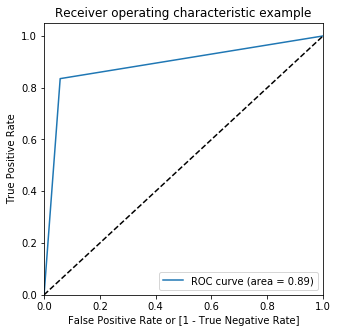

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

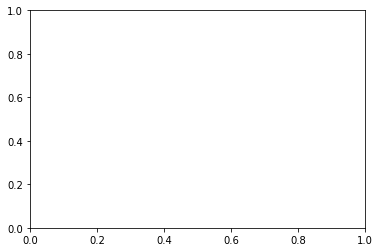

In [207]:
estimator = lgb.LGBMClassifier()
plt.rcParams.update({'font.size': 10})

param_grid ={'num_leaves': [31,60, 13], 
             'min_child_weight': [1e-2 ,1e-1, 1],
             'reg_alpha' : [0, 10, 100],
             'reg_lambda': [0, 100, 400, 500]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [43]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=500).fit(X_train, y_train)

In [44]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(388, 'change_copies'), (305, '# copies'), (196, 'Latitude'), (129, 'count_cicle'), (114, 'days_dif_deadline_end'), (113, 'days_dif_course_end'), (100, 'Mkt_impact'), (94, 'Course'), (77, 'visits'), (76, 'deadline_start_month'), (75, 'OTHER'), (72, '# copies per customer'), (72, '# Mkt_action 1'), (62, 'course_end_day'), (59, 'deadline_end_month'), (59, 'days_dif_deadline_start'), (53, 'course_end_month'), (46, 'GEOGRAPHY AND HISTORY'), (45, 'Current Seller id'), (42, 'deadline_start_day'), (39, 'deadline_end_day'), (39, 'Current year'), (37, 'LIBRARY'), (34, 'BIOLOGY AND GEOLOGY'), (30, 'action_during_deadline'), (30, 'MATHEMATICS'), (30, '# Mkt_action 3'), (29, 'Mkt_actions'), (29, 'MANAGEMENT BOARD'), (27, 'Town'), (27, 'Titularity'), (26, 'PRIMARY'), (25, 'Type activity_Commercial'), (25, '# Mkt_action 2'), (22, 'Subject'), (22, 'Sales ratio per customer'), (22, 'ENGLISH (PRIMARY)'), (21, 'MUSIC (PRIMARY)'), (18, 'RELIGION (PRIMARY)'), (15, 'ADMINISTRATI

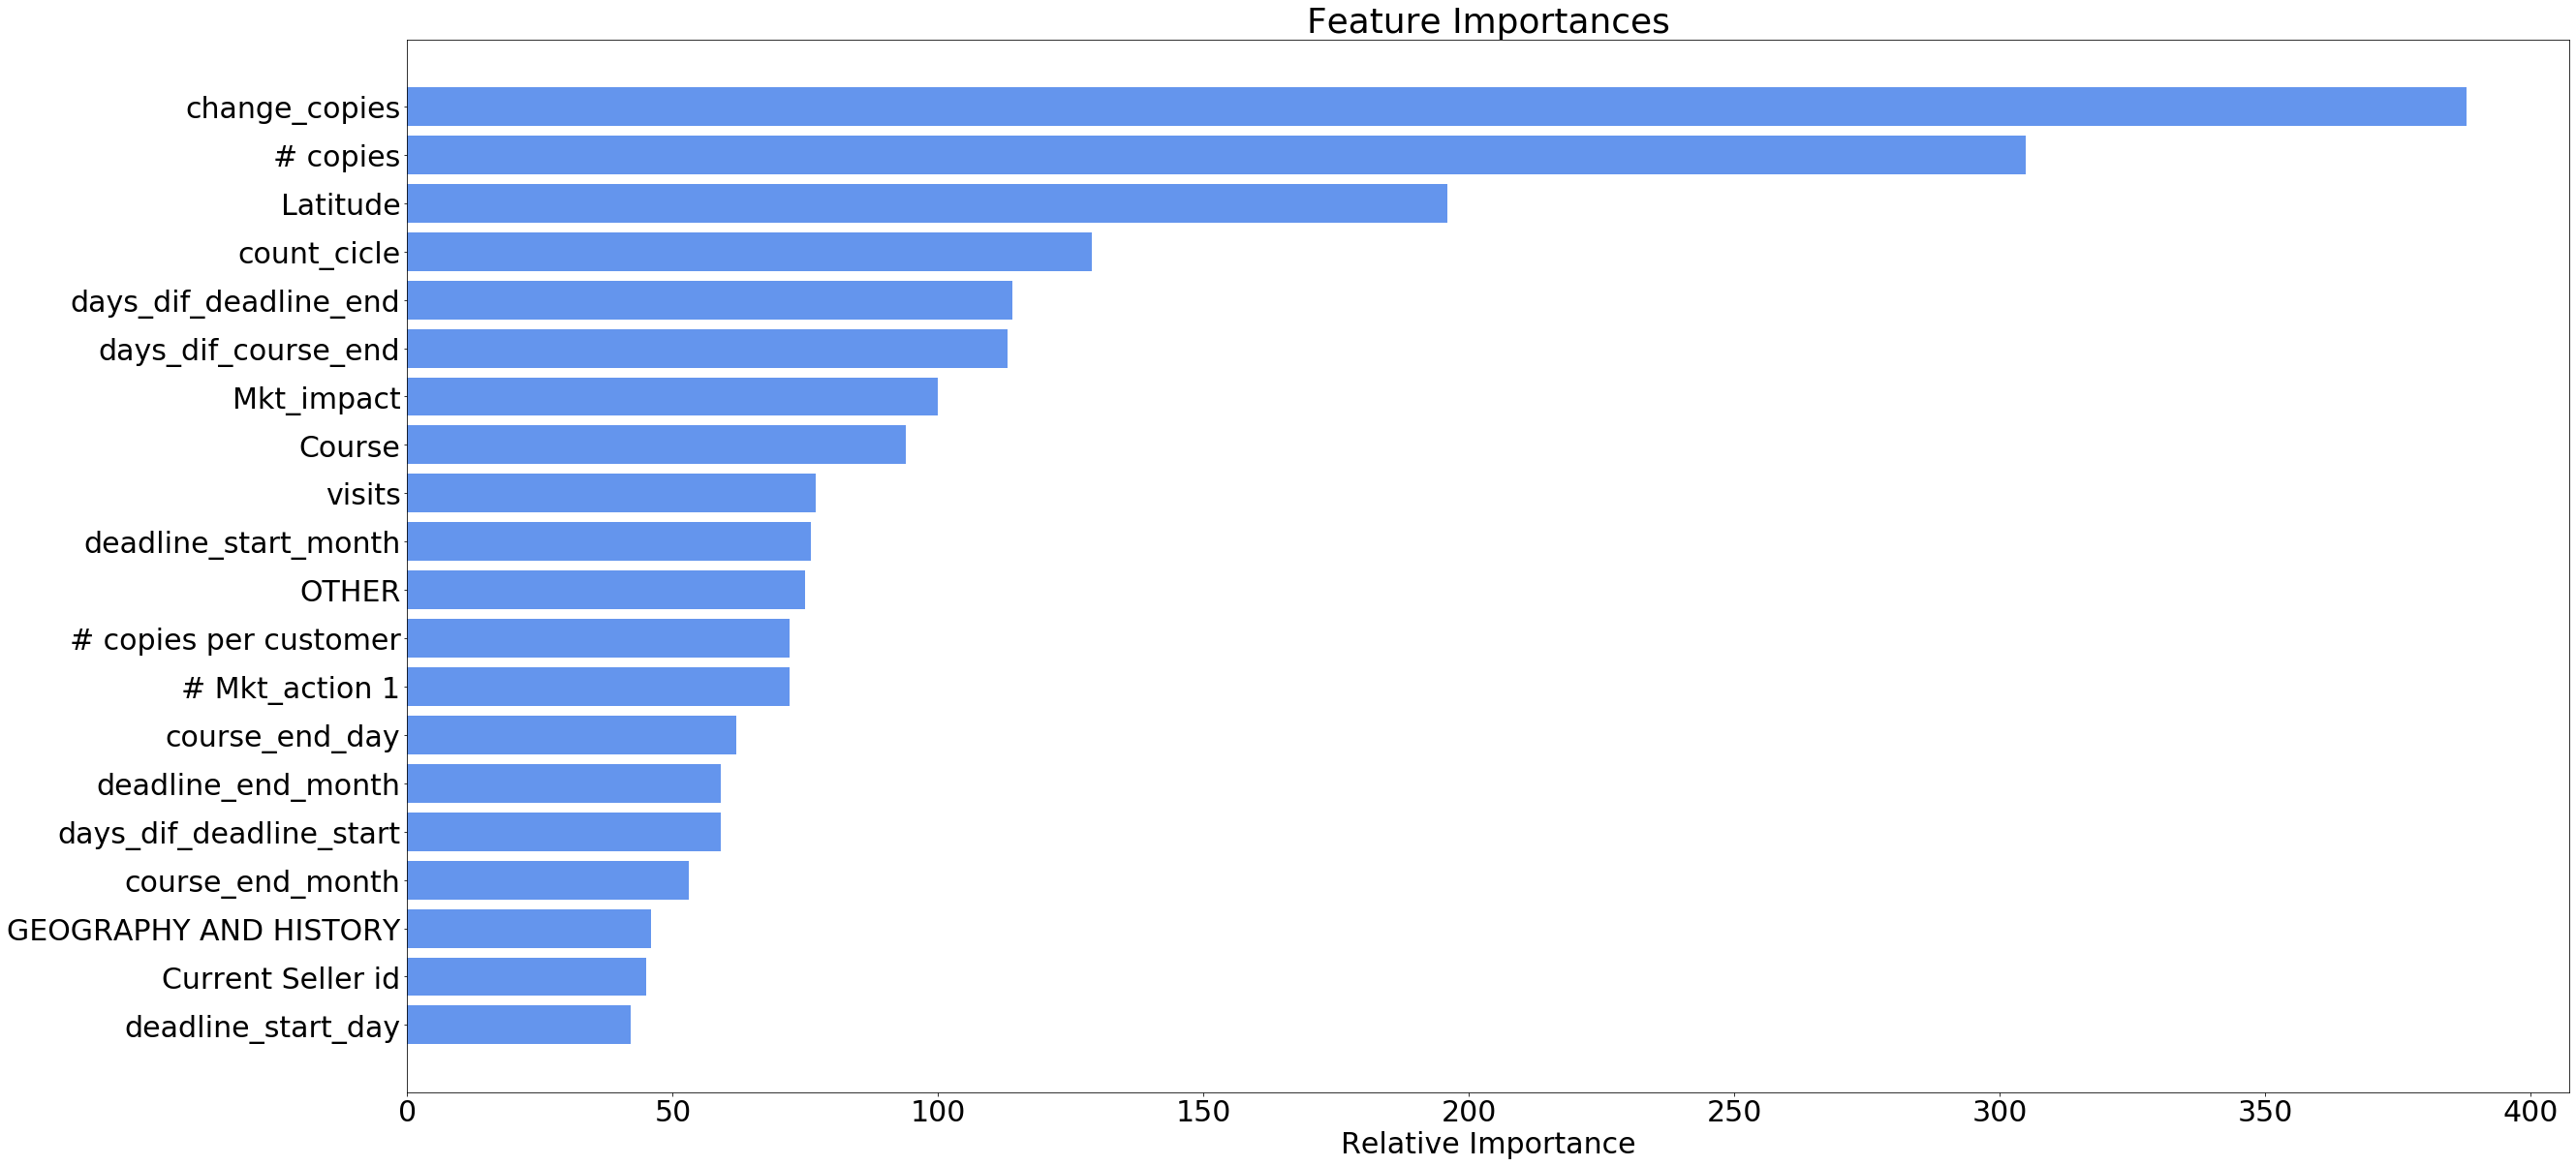

In [42]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='cornflowerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 30})
plt.show()

## LGBM for subject 60

In [55]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = subj_60.drop(["churn"], axis = 1), subj_60['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 500}
              precision    recall  f1-score   support

     class_0       0.88      0.93      0.91      3684
     class_1       0.88      0.80      0.84      2283

    accuracy                           0.88      5967
   macro avg       0.88      0.87      0.87      5967
weighted avg       0.88      0.88      0.88      5967


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          3430           254
class_1           457          1826
Accuracy_score on the test data:
0.8808446455505279
Roc auc on the test data:
0.8654389974903015


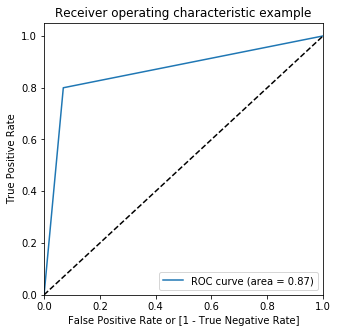

In [56]:
estimator = lgb.LGBMClassifier()
plt.rcParams.update({'font.size': 10})

param_grid ={'num_leaves': [31,60, 13], 
             'min_child_weight': [1e-2 ,1e-1, 1],
             'reg_alpha' : [0, 10, 100],
             'reg_lambda': [0, 100, 400, 500]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [57]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=500).fit(X_train, y_train)

In [58]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(388, 'change_copies'), (305, '# copies'), (196, 'Latitude'), (129, 'count_cicle'), (114, 'days_dif_deadline_end'), (113, 'days_dif_course_end'), (100, 'Mkt_impact'), (94, 'Course'), (77, 'visits'), (76, 'deadline_start_month'), (75, 'OTHER'), (72, '# copies per customer'), (72, '# Mkt_action 1'), (62, 'course_end_day'), (59, 'deadline_end_month'), (59, 'days_dif_deadline_start'), (53, 'course_end_month'), (46, 'GEOGRAPHY AND HISTORY'), (45, 'Current Seller id'), (42, 'deadline_start_day'), (39, 'deadline_end_day'), (39, 'Current year'), (37, 'LIBRARY'), (34, 'BIOLOGY AND GEOLOGY'), (30, 'action_during_deadline'), (30, 'MATHEMATICS'), (30, '# Mkt_action 3'), (29, 'Mkt_actions'), (29, 'MANAGEMENT BOARD'), (27, 'Town'), (27, 'Titularity'), (26, 'PRIMARY'), (25, 'Type activity_Commercial'), (25, '# Mkt_action 2'), (22, 'Subject'), (22, 'Sales ratio per customer'), (22, 'ENGLISH (PRIMARY)'), (21, 'MUSIC (PRIMARY)'), (18, 'RELIGION (PRIMARY)'), (15, 'ADMINISTRATI

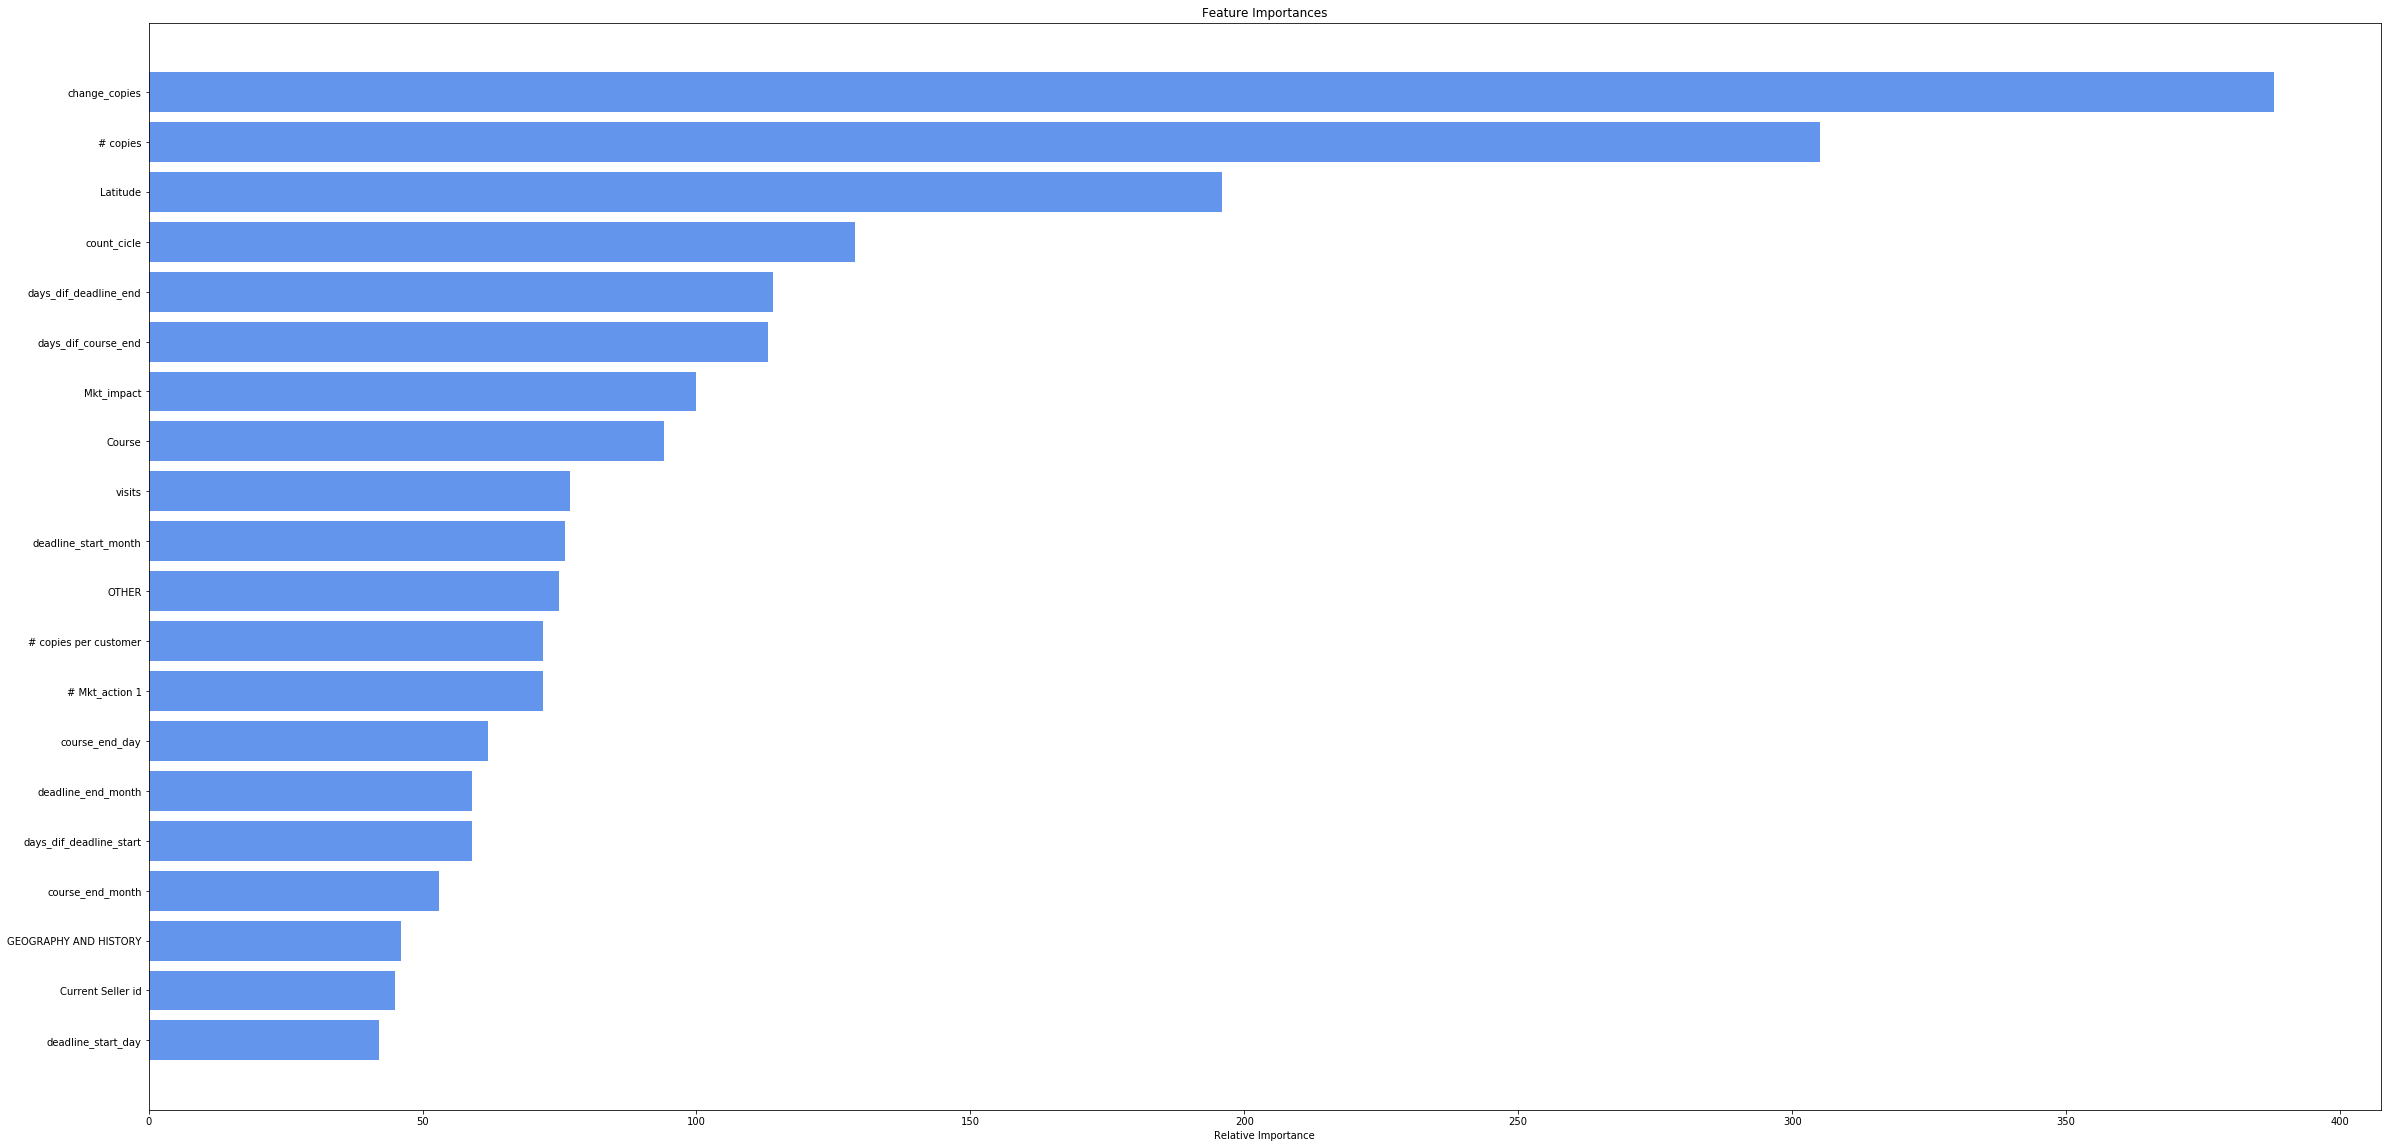

In [59]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='cornflowerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 30})
plt.show()

## LGBM for subject 54

In [76]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = subj_13.drop(["churn"], axis = 1), subj_13['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0}
              precision    recall  f1-score   support

     class_0       0.90      0.94      0.92      2217
     class_1       0.90      0.84      0.87      1413

    accuracy                           0.90      3630
   macro avg       0.90      0.89      0.89      3630
weighted avg       0.90      0.90      0.90      3630


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2089           128
class_1           233          1180
Accuracy_score on the test data:
0.9005509641873278
Roc auc on the test data:
0.8886834698484113


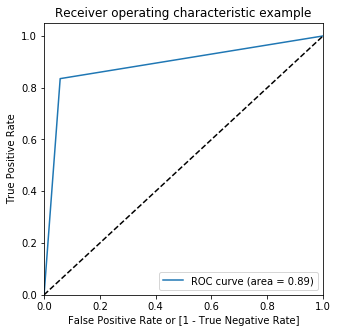

In [77]:
estimator = lgb.LGBMClassifier()
plt.rcParams.update({'font.size': 10})
# {'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0}
param_grid ={'num_leaves': [31,60, 13], 
             'min_child_weight': [1e-2 ,1e-1, 1],
             'reg_alpha' : [0, 10, 100],
             'reg_lambda': [0, 100, 400, 500]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [57]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=500).fit(X_train, y_train)

In [58]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(388, 'change_copies'), (305, '# copies'), (196, 'Latitude'), (129, 'count_cicle'), (114, 'days_dif_deadline_end'), (113, 'days_dif_course_end'), (100, 'Mkt_impact'), (94, 'Course'), (77, 'visits'), (76, 'deadline_start_month'), (75, 'OTHER'), (72, '# copies per customer'), (72, '# Mkt_action 1'), (62, 'course_end_day'), (59, 'deadline_end_month'), (59, 'days_dif_deadline_start'), (53, 'course_end_month'), (46, 'GEOGRAPHY AND HISTORY'), (45, 'Current Seller id'), (42, 'deadline_start_day'), (39, 'deadline_end_day'), (39, 'Current year'), (37, 'LIBRARY'), (34, 'BIOLOGY AND GEOLOGY'), (30, 'action_during_deadline'), (30, 'MATHEMATICS'), (30, '# Mkt_action 3'), (29, 'Mkt_actions'), (29, 'MANAGEMENT BOARD'), (27, 'Town'), (27, 'Titularity'), (26, 'PRIMARY'), (25, 'Type activity_Commercial'), (25, '# Mkt_action 2'), (22, 'Subject'), (22, 'Sales ratio per customer'), (22, 'ENGLISH (PRIMARY)'), (21, 'MUSIC (PRIMARY)'), (18, 'RELIGION (PRIMARY)'), (15, 'ADMINISTRATI

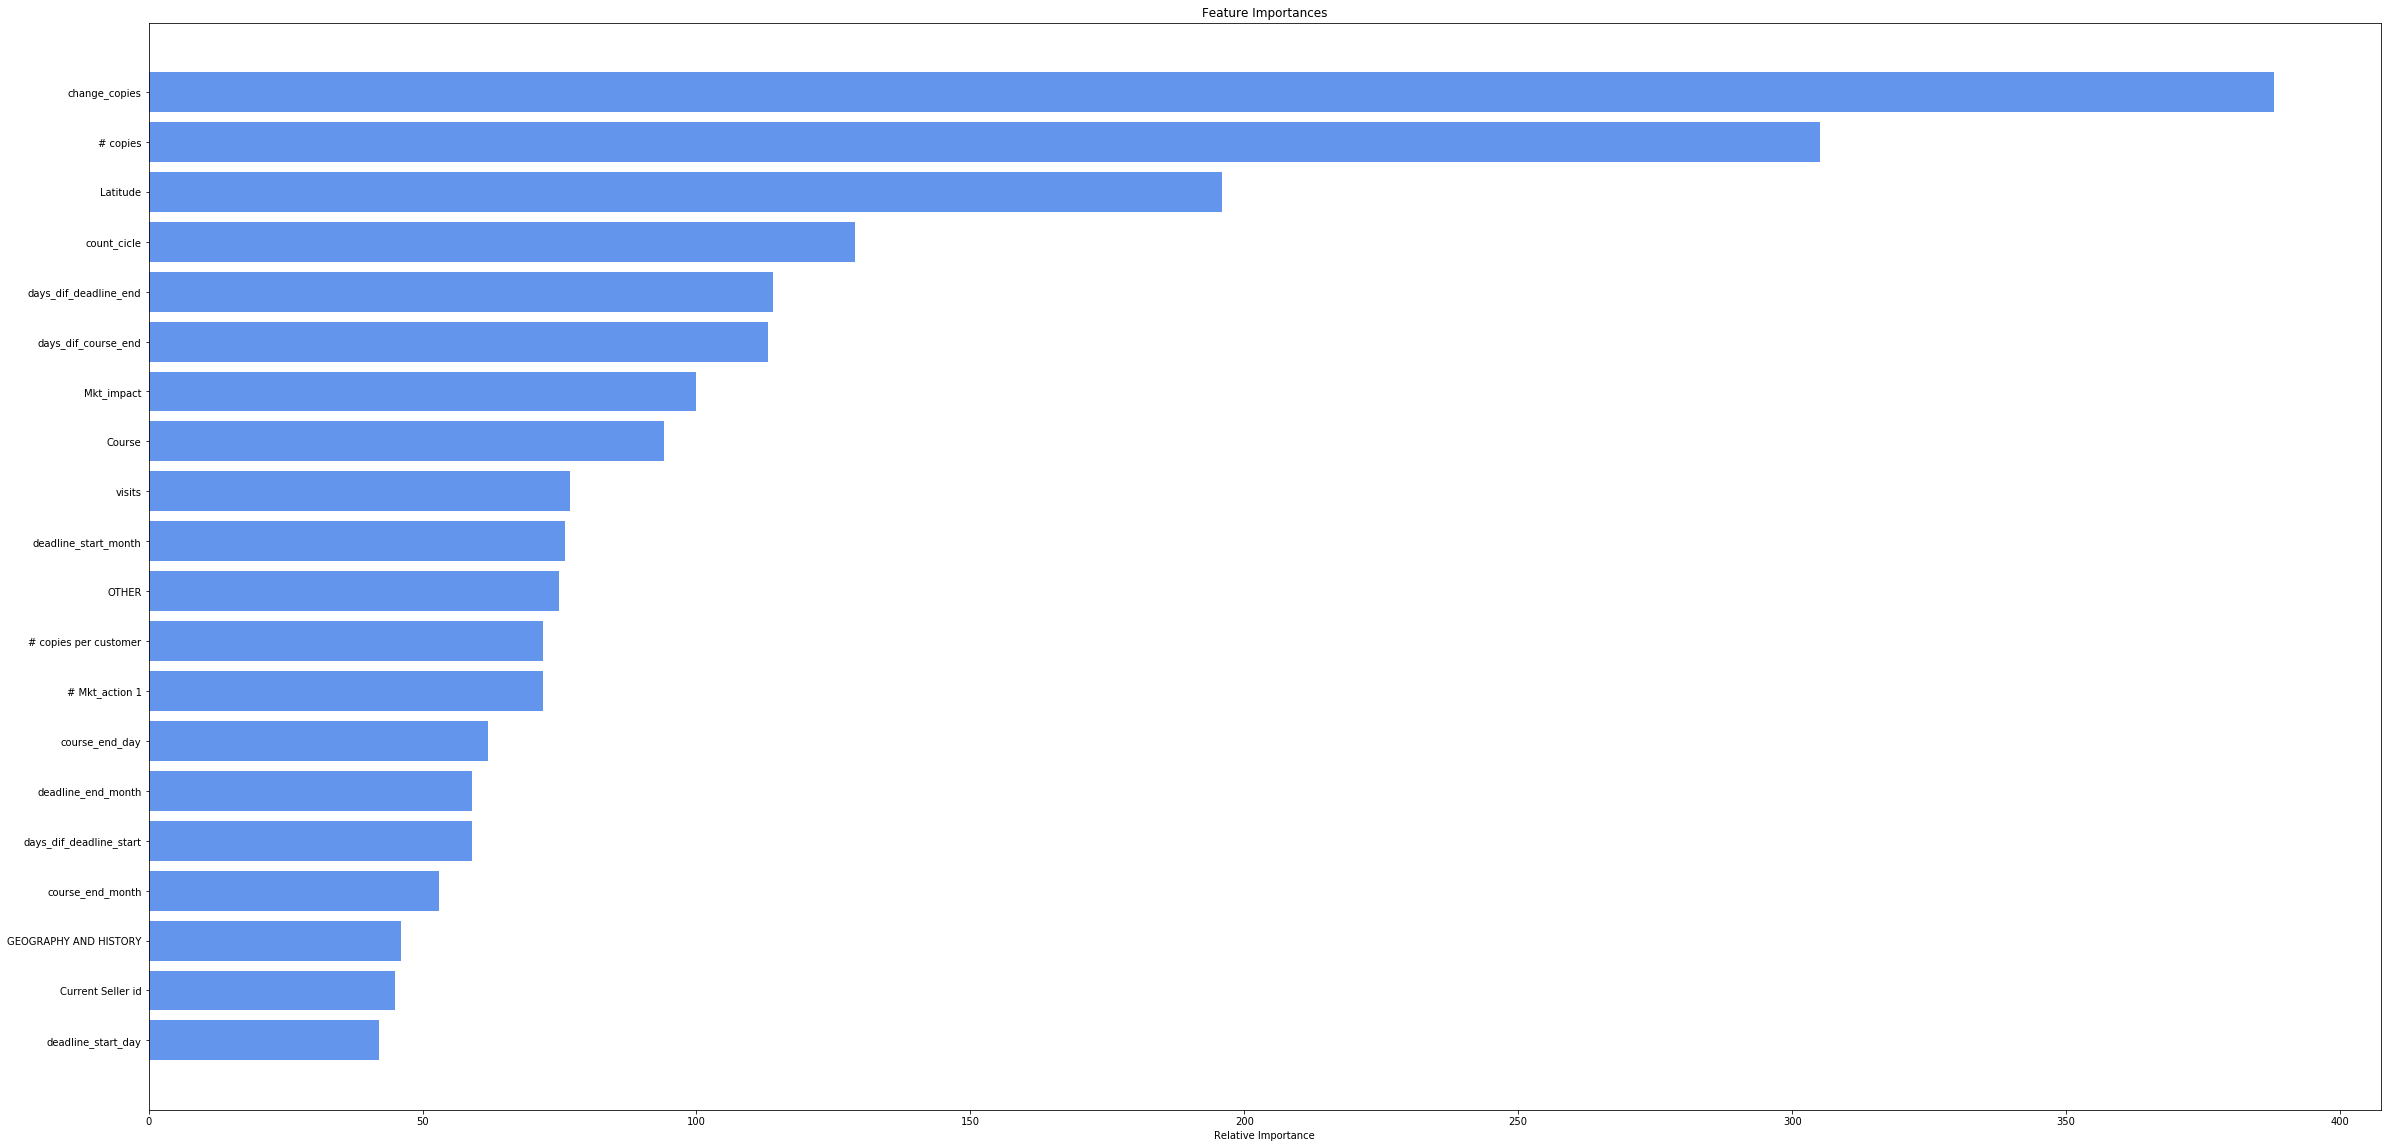

In [59]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='cornflowerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 30})
plt.show()

In [1989]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)


In [1950]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 190 out of 200 | elapsed:   12.8s remaining:    0.7s


Best params for accuracy_score
{'C': 1.0, 'penalty': 'l2', 'random_state': 42}
              precision    recall  f1-score   support

     class_0       0.75      0.85      0.80      3256
     class_1       0.79      0.66      0.71      2690

    accuracy                           0.76      5946
   macro avg       0.77      0.75      0.76      5946
weighted avg       0.77      0.76      0.76      5946


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0          2773           483
class_1           926          1764
Accuracy_score on the test data:
0.7630339724184325


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.1s finished
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# XGBoost

In [12]:
import xgboost as xgb

In [14]:
import matplotlib.pyplot as plt

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 15, 'subsample': 0.8}
              precision    recall  f1-score   support

     class_0       0.77      0.86      0.81      3256
     class_1       0.80      0.68      0.74      2690

    accuracy                           0.78      5946
   macro avg       0.78      0.77      0.77      5946
weighted avg       0.78      0.78      0.78      5946


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2805           451
class_1           858          1832
Accuracy_score on the test data:
0.7798520013454423
Roc auc on the test data:
0.7712636893398975


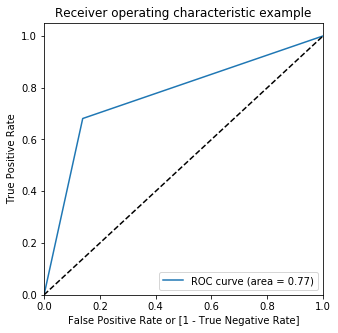

In [15]:
estimator = xgb.XGBClassifier()
param_grid = {
        'min_child_weight': [7,10,15],
        'gamma': [0.3,0.5, 0.7],
        'subsample': [0.6 ,0.8],
        'colsample_bytree': [0.8,1.0],
        'max_depth': [3, 5]
        }

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [16]:
model_xgb =xgb.XGBClassifier(colsample_bytree= 0.8, gamma= 0.5, max_depth= 3, min_child_weight=15, subsample= 0.8).fit(X_train, y_train)

In [17]:
print ("Sorted Feature Importance:")
importances = model_xgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(0.39051428, 'change_copies'), (0.08663677, '# copies'), (0.028872307, 'Current year'), (0.02512377, 'count_cicle'), (0.023681128, 'Type Current Support'), (0.020443626, 'Customer heading'), (0.020007676, 'Course'), (0.019675292, '# copies per customer'), (0.015862804, 'Mkt_impact'), (0.0151707465, 'visits'), (0.014769182, 'Titularity'), (0.014714015, 'BIOLOGY AND GEOLOGY'), (0.014031733, 'Latitude'), (0.013986071, 'INFORMATION TECHNOLOGY'), (0.013886446, 'Current Seller id'), (0.013796541, '# Mkt_action 1'), (0.013593997, 'Type activity_Commercial'), (0.013332257, 'Longitude'), (0.012970379, '# Mkt_action 3'), (0.012864787, 'days_dif_deadline_start'), (0.012676242, 'MATHEMATICS'), (0.01254636, 'days_dif_deadline_end'), (0.012408187, 'deadline_end_month'), (0.011661226, 'action_during_deadline'), (0.011525034, 'Sales ratio per customer'), (0.011002097, 'course_end_month'), (0.0109614935, 'deadline_end_day'), (0.010786539, 'days_dif_course_end'), (0.010329583

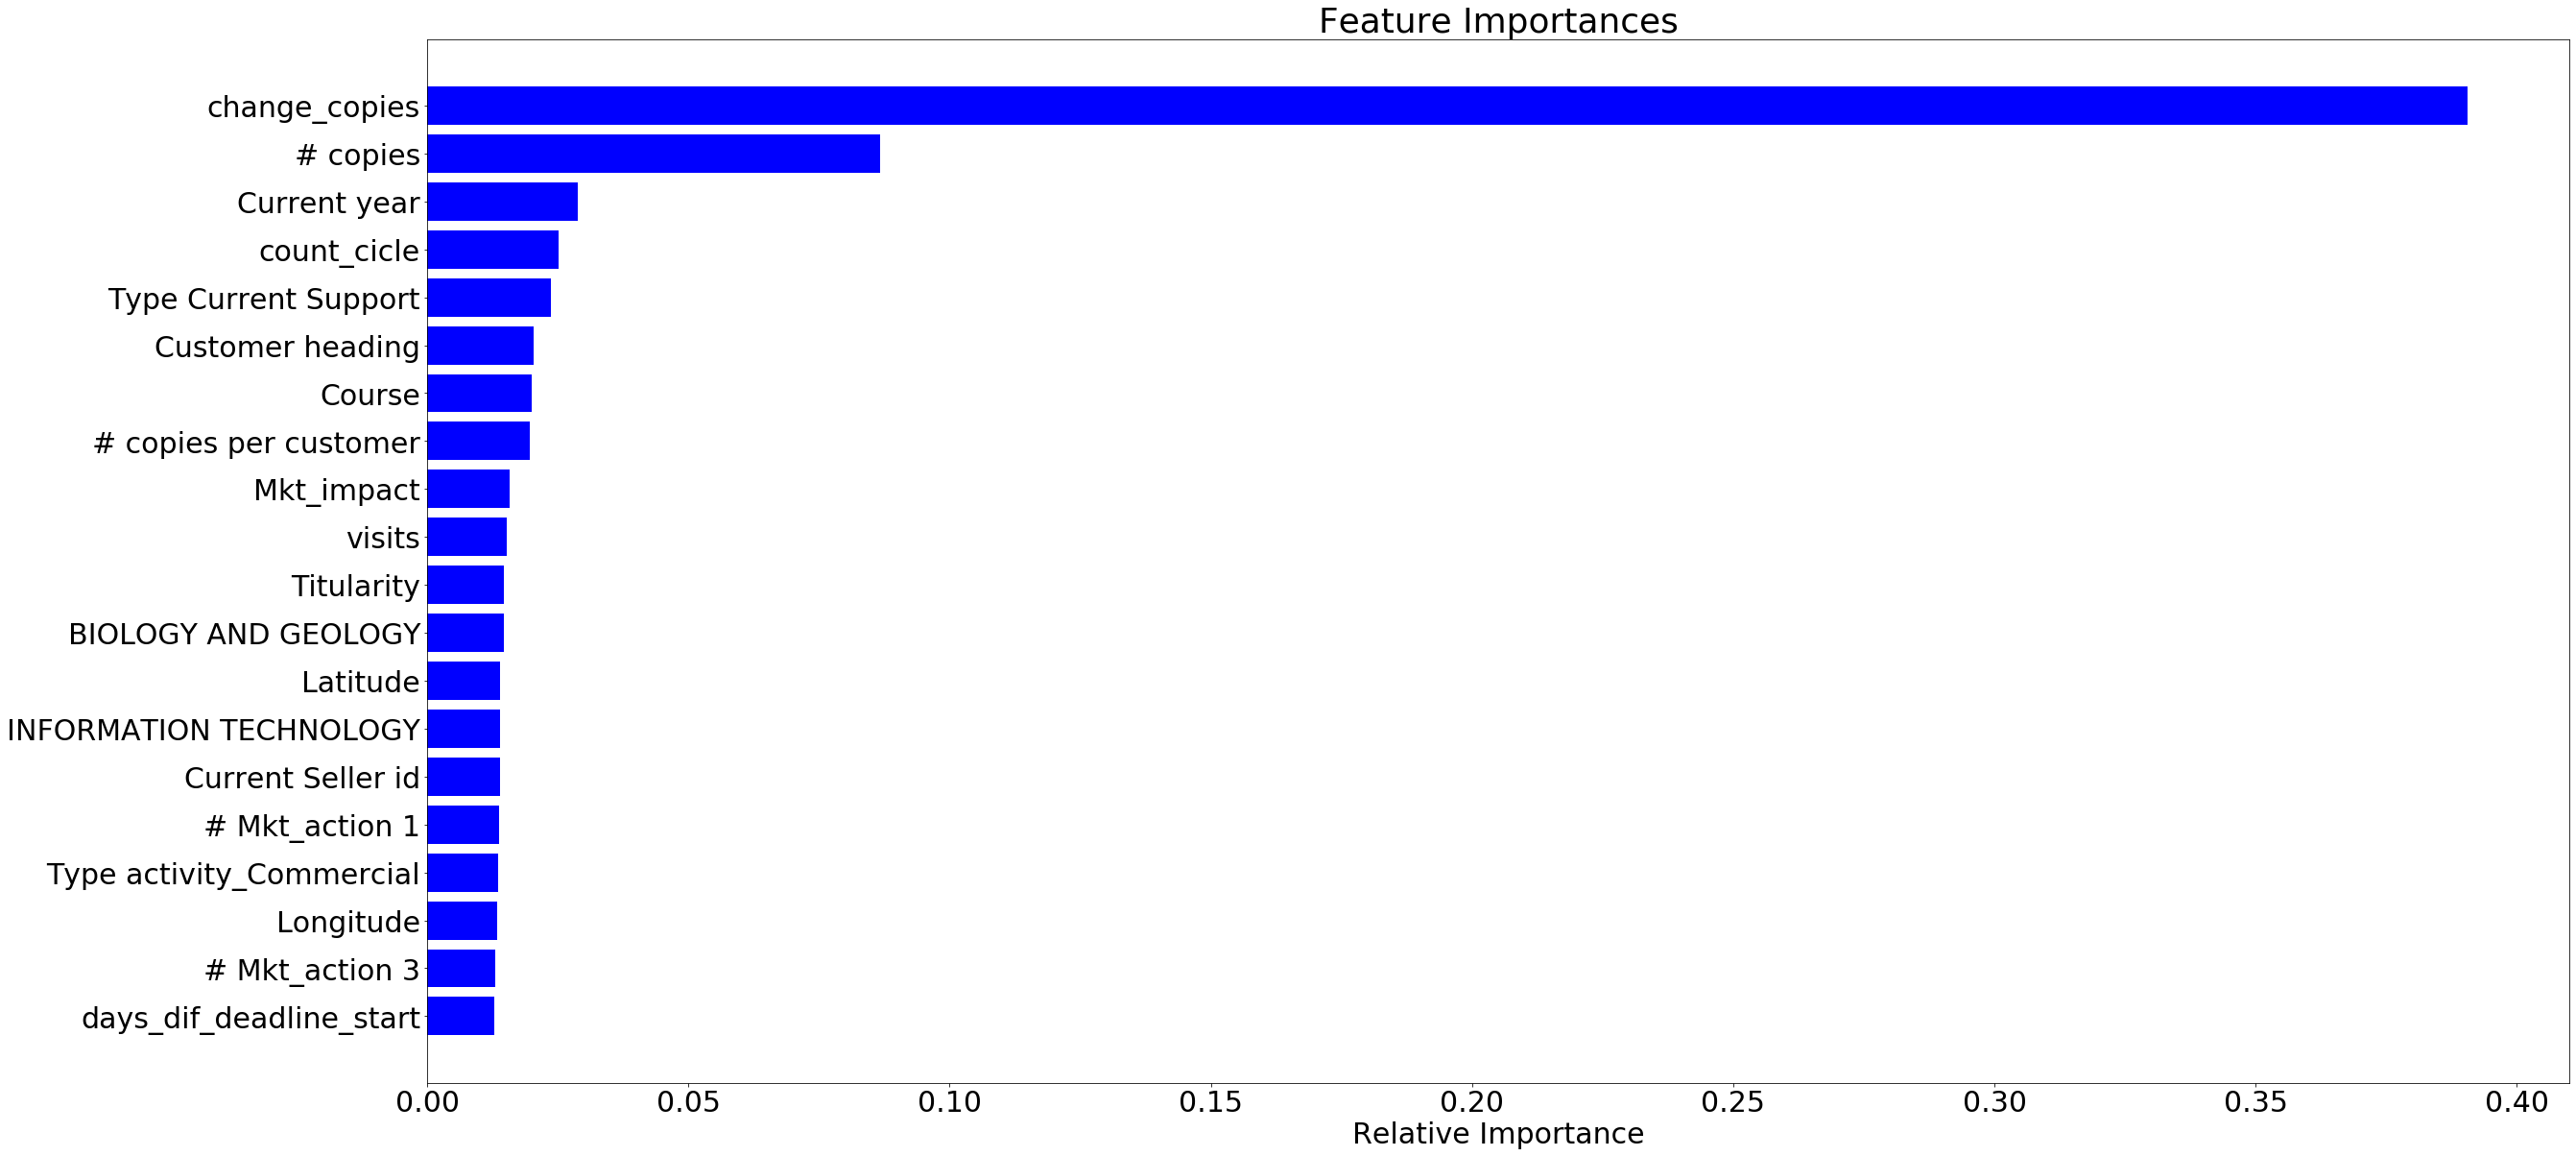

In [19]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 40})
plt.show()

## Random Forest

In [1957]:
estimator = RandomForestClassifier()

param_grid ={ 'n_estimators': [200, 500],
                                     'max_features': ['auto', 'sqrt', 'log2'],
                                     'max_depth' : [4,5,6,7,8],
                                     'criterion' :['gini', 'entropy']
            }
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

     class_0       0.72      0.87      0.79      3256
     class_1       0.79      0.59      0.68      2690

    accuracy                           0.74      5946
   macro avg       0.76      0.73      0.73      5946
weighted avg       0.75      0.74      0.74      5946


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0          2833           423
class_1          1099          1591
Accuracy_score on the test data:
0.7440295997309115


## LGBM

In [2003]:
import lightgbm as lgb

In [1992]:
estimator = lgb

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 100.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 100}
              precision    recall  f1-score   support

     class_0       0.77      0.86      0.81      3256
     class_1       0.80      0.69      0.74      2690

    accuracy                           0.78      5946
   macro avg       0.78      0.77      0.77      5946
weighted avg       0.78      0.78      0.78      5946


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0          2796           460
class_1           847          1843
Accuracy_score on the test data:
0.7801883619239826


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.2min finished


In [1976]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=100).fit(X_train, y_train)

AttributeError: 'LGBMClassifier' object has no attribute 'LGBMClassifier'

In [1975]:
importances = model_lgb.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1994]:
sorted([*zip(train.drop('churn', axis =1).columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1])

[('Numer_of_Representatives', 412),
 ('# copies', 398),
 ('change_copies', 210),
 ('# Mkt_action 2', 188),
 ('ADMINISTRATION', 186),
 ('Type activity_Administration', 180),
 ('Course', 152),
 ('Current year', 135),
 ('# Mkt_action 3', 123),
 ('Customer heading', 102),
 ('Current Seller id', 90),
 ('Latitude', 86),
 ('# copies per customer', 80),
 ('total_visits_2015', 73),
 ('Town', 56),
 ('OWNERSHIP TEAM', 52),
 ('QUALITY', 51),
 ('MATHEMATICS', 35),
 ('Subject', 28),
 ('MANAGEMENT BOARD', 26),
 ('Sales ratio per customer', 19),
 ('Type activity_Customer training', 18),
 ('MUSIC (PRIMARY)', 15),
 ('ECONOMY', 14),
 ('Titularity', 12),
 ('INFORMATION TECHNOLOGY', 9),
 ('LATIN & GREEK', 6),
 ('UNALLOCATED', 5),
 ('BIOLOGY AND GEOLOGY', 4),
 ('FRENCH (PRIMARY)', 4),
 ('count_cicle', 3),
 ('SPANISH LANGUAGE', 3),
 ('TECHNOLOGY', 3),
 ('PHYSICS AND CHEMISTRY', 2),
 ('PLASTIC COURSE', 2),
 ('Type Current Support', 1),
 ('Institution', 1),
 ('Longitude', 0),
 ('Type activity_Collect Informati

## Modelling per each subject

In [1978]:
full_data['Subject'].unique()

[60, 65, 79, 54, 15, 13]
Categories (6, int64): [60, 65, 79, 54, 15, 13]

In [60]:
subj_60 = full_data[full_data['Subject'] == 60]
subj_65 = full_data[full_data['Subject'] == 65]
subj_79 = full_data[full_data['Subject'] == 79]
subj_54 = full_data[full_data['Subject'] == 54]
subj_15 = full_data[full_data['Subject'] == 15]
subj_13 = full_data[full_data['Subject'] == 13]

# Subject 60

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [1996]:
train = subj_60[(subj_60['Current year'] == 2015) |(subj_60['Current year'] == 2016) | (subj_60['Current year'] == 2017)]
test = subj_60[(subj_60['Current year'] == 2018)]

In [2013]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [1998]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 10}
              precision    recall  f1-score   support

     class_0       0.71      0.86      0.78       760
     class_1       0.79      0.59      0.67       647

    accuracy                           0.74      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.75      0.74      0.73      1407


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           657           103
class_1           268           379
Accuracy_score on the test data:
0.736318407960199


In [2034]:
import lightgbm as lgb

In [2015]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=10).fit(X_train, y_train)

In [2039]:
list(X_train)

[array([ 0.46311569,  0.97382229,  2.85787971,  0.13781993,  0.23435522,
         0.84115319,  0.84115319,  0.97014082, -0.28908864, -1.30992455,
        -0.68486836,  0.52693446,  0.14520907,  0.07048992,  2.5187276 ,
         0.0256579 ,  0.        ,  0.15648566,  0.        ,  0.04917432,
         0.        ,  0.0256579 ,  0.        ,  0.        ,  0.        ,
         0.09044546, -0.48340767, -0.10686711, -0.12569185, -0.07790532,
        -0.13762862, -0.01481035, -0.11439926, -0.0894159 , -0.05263852,
        -0.15649956, -0.3610697 , -0.15323009, -0.09782391,  0.        ,
        -0.23995656,  0.        , -0.0370472 , -0.06151509, -0.1167297 ,
        -0.08537913, -0.34648478, -0.02963044,  0.        , -0.15853428,
        -0.11929552, -0.13401006, -0.06722064, -0.04069286,  5.17597339,
         6.06827739,  4.97734717,  0.26976081]),
 array([ 1.05942818,  0.97382229,  3.11651585,  0.13781993,  0.23435522,
         0.84115319,  0.84115319,  0.97014082, -0.28908864, -1.30992455,
  

In [2041]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(230, 'change_copies'), (154, '# copies'), (120, '# Mkt_action 1'), (115, 'Sales ratio per customer'), (94, 'count_cicle'), (81, 'Customer heading'), (78, '# Mkt_action 3'), (68, '# copies per customer'), (60, '# Mkt_action 2'), (51, 'Latitude'), (37, 'Current year'), (37, 'Current Seller id'), (30, 'Town'), (27, 'Course'), (15, 'Titularity'), (11, 'Numer_of_Representatives'), (4, 'PRIMARY'), (2, 'Institution'), (2, 'BIOLOGY AND GEOLOGY'), (1, 'OTHER'), (1, 'MANAGEMENT BOARD'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SP

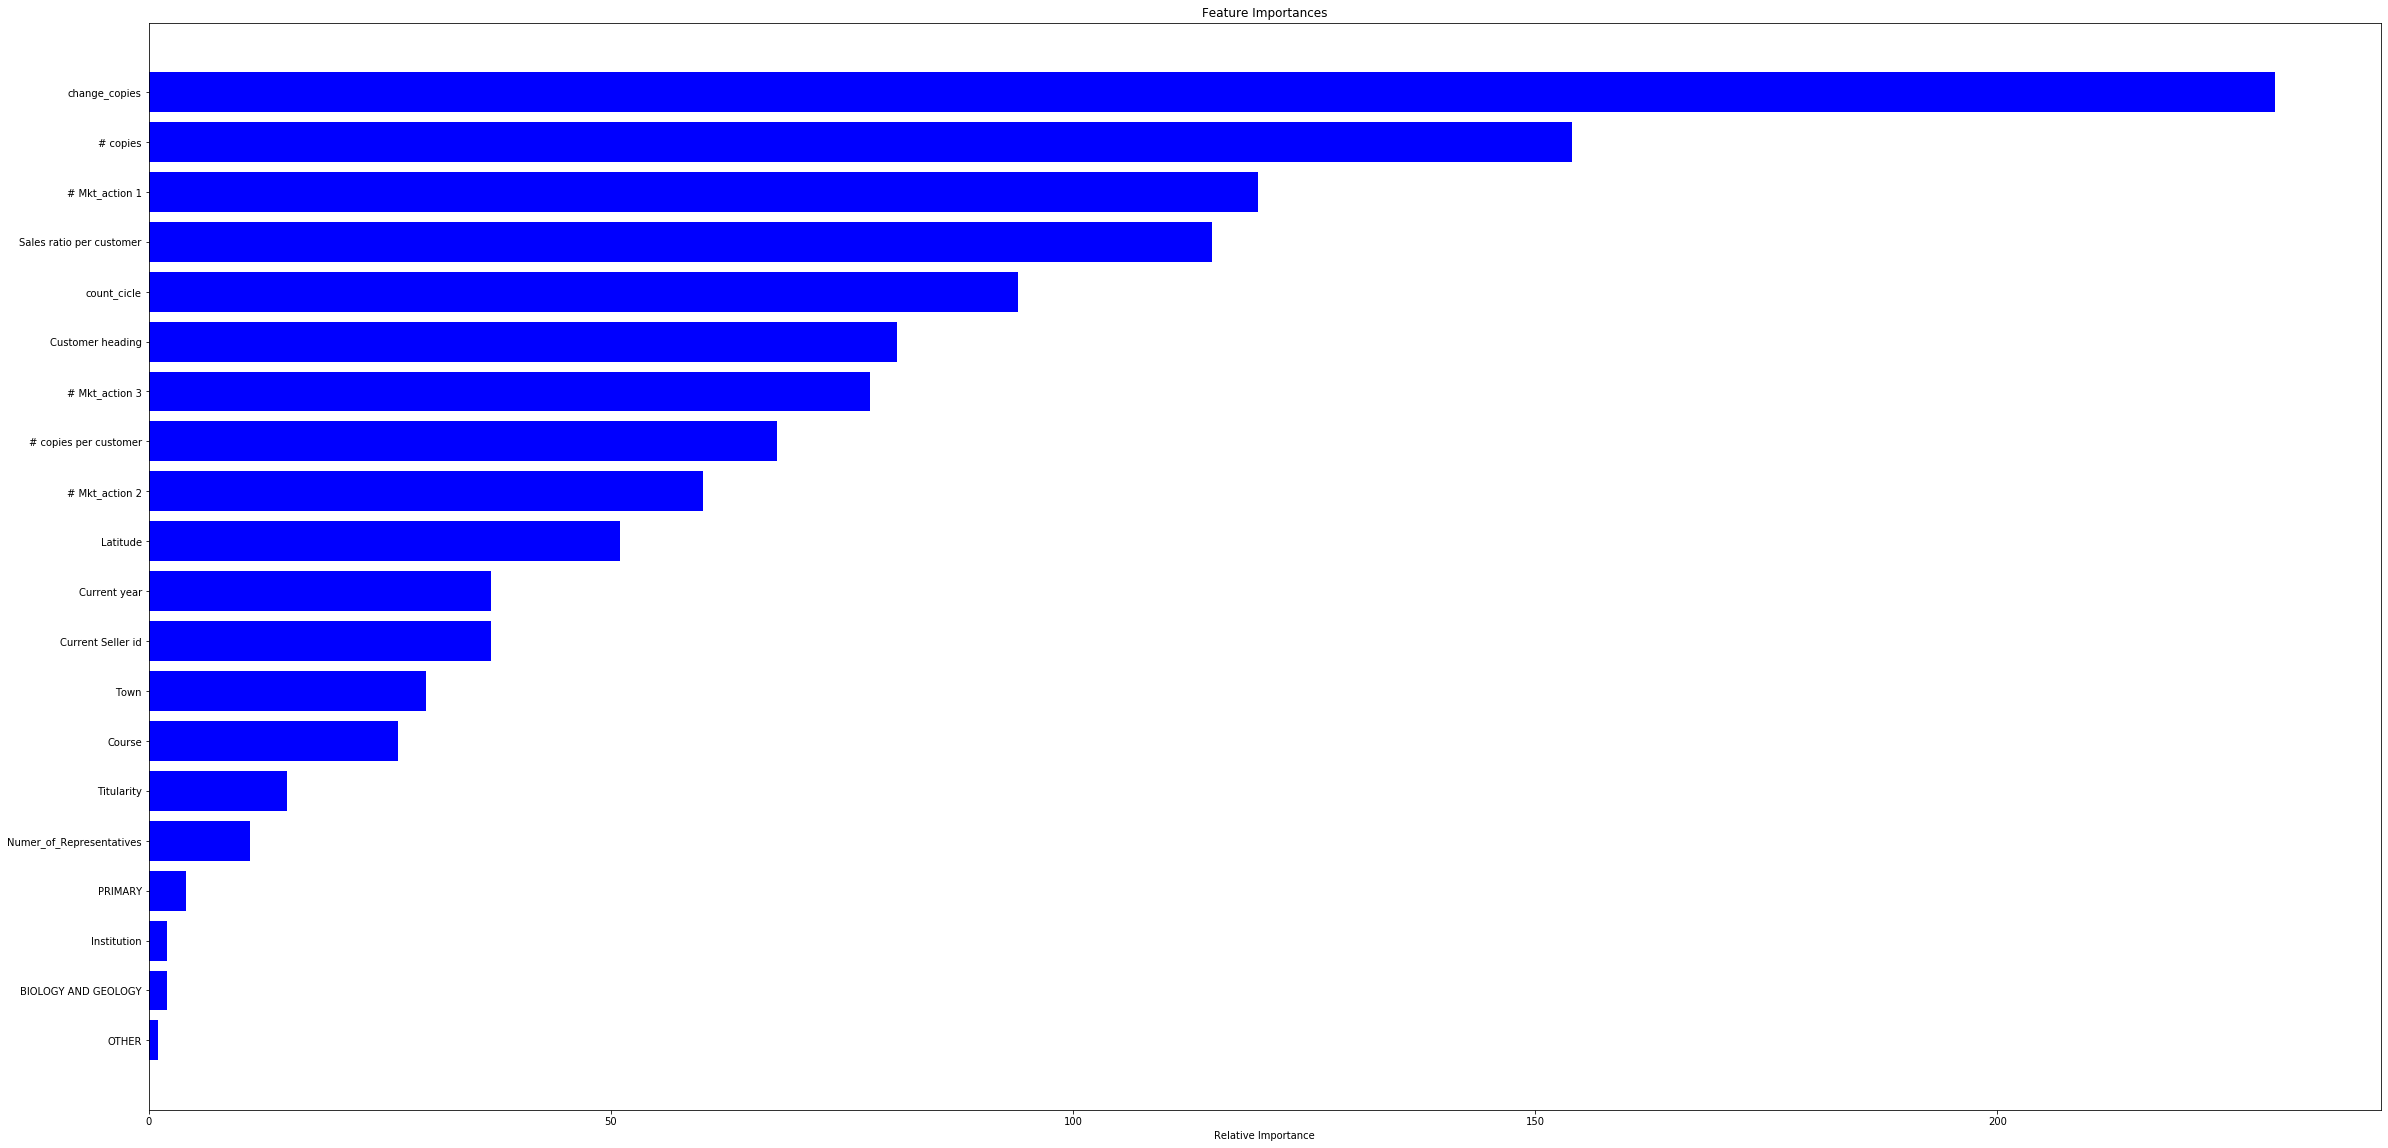

In [2045]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 65

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2120]:
train = subj_65[(subj_65['Current year'] == 2015) |(subj_65['Current year'] == 2016) | (subj_65['Current year'] == 2017)]
test = subj_65[(subj_65['Current year'] == 2018)]

In [2121]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2126]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1964s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1549s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    4.3s
[Parallel(n_j

Best params for accuracy_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 5, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

     class_0       0.78      0.88      0.82       173
     class_1       0.80      0.66      0.73       130

    accuracy                           0.79       303
   macro avg       0.79      0.77      0.77       303
weighted avg       0.79      0.79      0.78       303


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           152            21
class_1            44            86
Accuracy_score on the test data:
0.7854785478547854


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   11.6s finished


In [2034]:
import lightgbm as lgb

In [2127]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 5, reg_lambda= 0.1).fit(X_train, y_train)

In [2128]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(150, 'change_copies'), (105, '# copies'), (103, 'Customer heading'), (97, 'Sales ratio per customer'), (84, '# copies per customer'), (30, 'count_cicle'), (29, '# Mkt_action 2'), (26, 'Numer_of_Representatives'), (12, '# Mkt_action 1'), (10, '# Mkt_action 3'), (9, 'Titularity'), (6, 'Current Seller id'), (4, 'Town'), (2, 'MATHEMATICS'), (1, 'total_visits_2015'), (1, 'OTHER'), (1, 'Current year'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRIMARY)'), (0, 'REGIONAL LANGUAGE'), (0, 'QUALITY'), (0, '

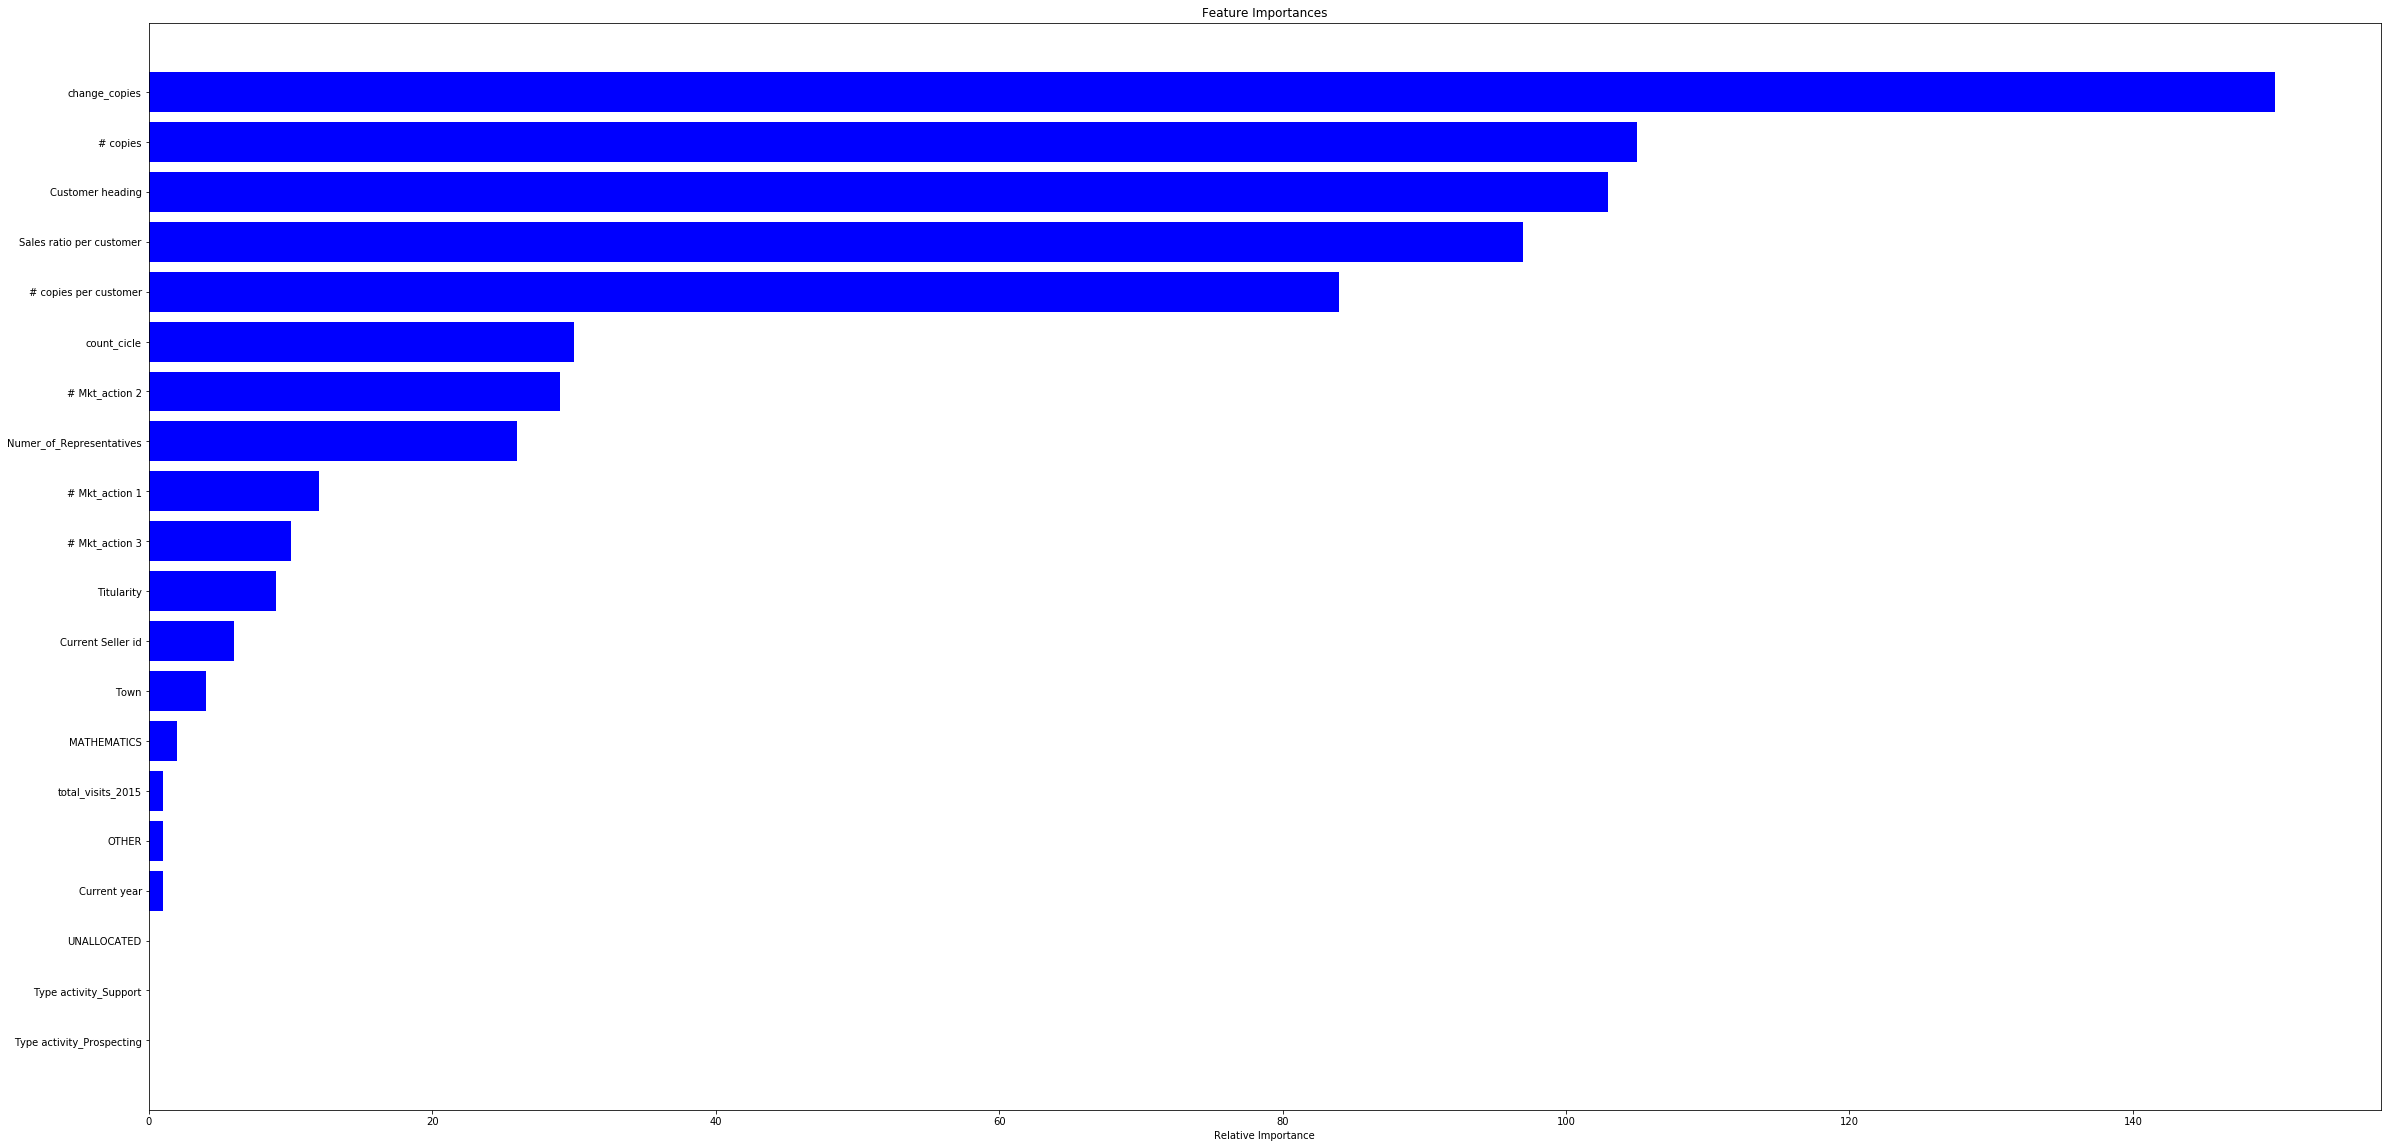

In [2129]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 79

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2130]:
train = subj_79[(subj_79['Current year'] == 2015) |(subj_79['Current year'] == 2016) | (subj_79['Current year'] == 2017)]
test = subj_79[(subj_79['Current year'] == 2018)]

In [2131]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2133]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 100}
              precision    recall  f1-score   support

     class_0       0.79      0.87      0.83       568
     class_1       0.77      0.65      0.71       384

    accuracy                           0.78       952
   macro avg       0.78      0.76      0.77       952
weighted avg       0.78      0.78      0.78       952


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           495            73
class_1           133           251
Accuracy_score on the test data:
0.7836134453781513


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   27.3s finished


In [2034]:
import lightgbm as lgb

In [2134]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=100).fit(X_train, y_train)

In [2135]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(269, 'change_copies'), (218, '# copies'), (188, 'Customer heading'), (123, 'count_cicle'), (107, '# copies per customer'), (78, '# Mkt_action 1'), (51, '# Mkt_action 2'), (40, '# Mkt_action 3'), (33, 'Sales ratio per customer'), (29, 'Town'), (17, 'total_visits_2015'), (9, 'Course'), (5, 'MATHEMATICS'), (5, 'Current year'), (3, 'Titularity'), (3, 'Numer_of_Representatives'), (3, 'LIBRARY'), (2, 'Institution'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRIMARY)'), (0, 'REGIONAL LANGUAGE'), (0, 'QU

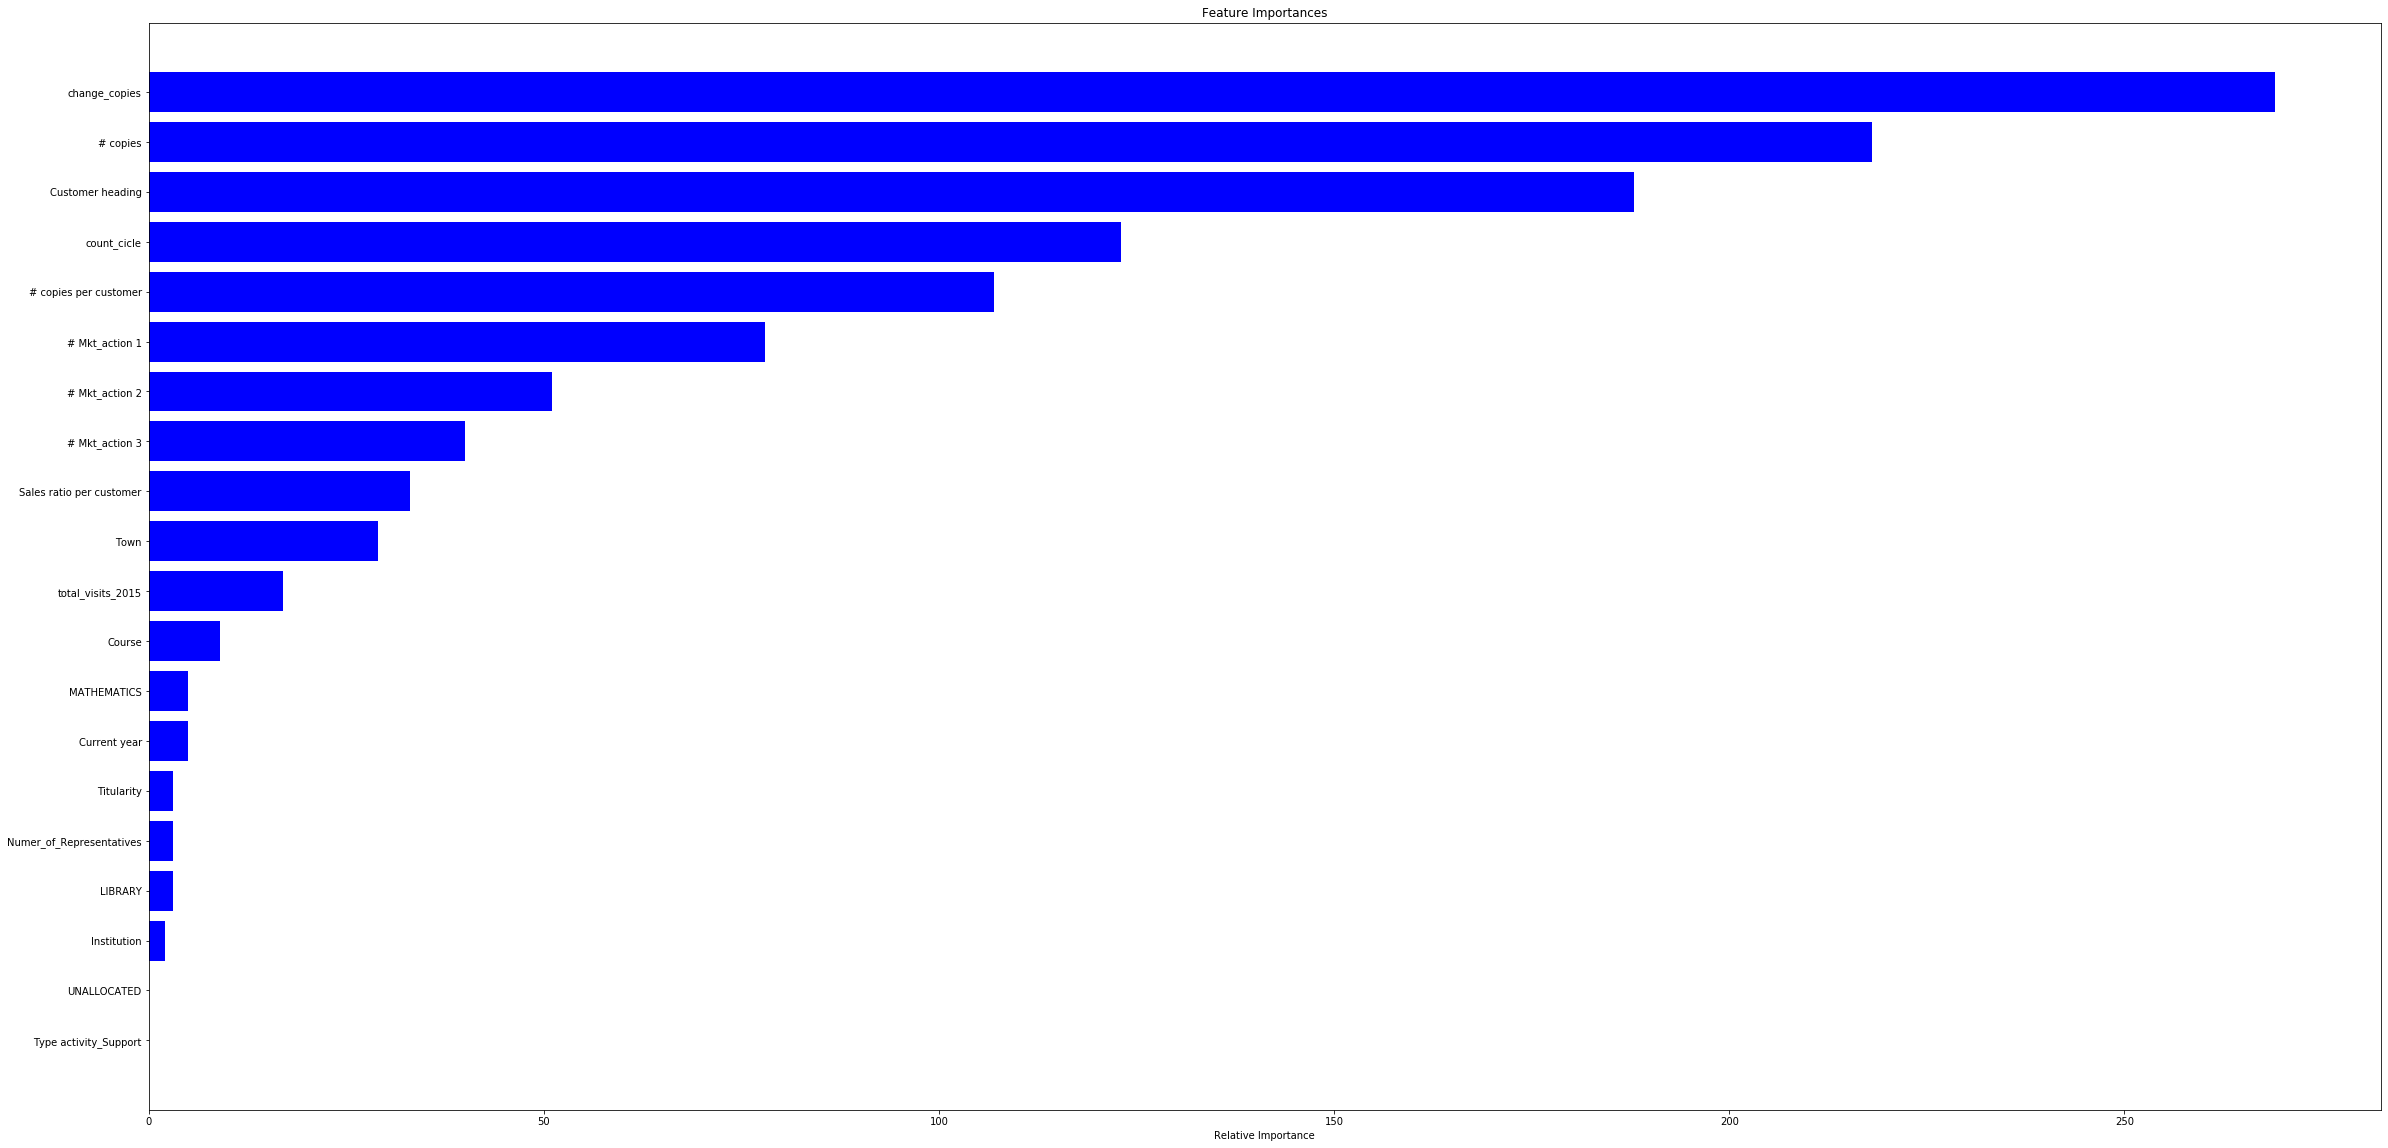

In [2136]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 54

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2137]:
train = subj_54[(subj_54['Current year'] == 2015) |(subj_54['Current year'] == 2016) | (subj_54['Current year'] == 2017)]
test = subj_54[(subj_54['Current year'] == 2018)]

In [2138]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2139]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

     class_0       0.75      0.85      0.80       796
     class_1       0.80      0.67      0.73       696

    accuracy                           0.77      1492
   macro avg       0.77      0.76      0.76      1492
weighted avg       0.77      0.77      0.76      1492


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           676           120
class_1           228           468
Accuracy_score on the test data:
0.7667560321715817


In [2034]:
import lightgbm as lgb

In [2140]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=0.1).fit(X_train, y_train)

In [2141]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(229, 'change_copies'), (183, '# Mkt_action 1'), (148, '# copies'), (97, '# copies per customer'), (74, '# Mkt_action 2'), (62, 'count_cicle'), (59, 'Course'), (52, 'Latitude'), (48, '# Mkt_action 3'), (43, 'Customer heading'), (42, 'Sales ratio per customer'), (42, 'Current Seller id'), (10, 'Titularity'), (9, 'Town'), (6, 'PRIMARY'), (4, 'Institution'), (4, 'Current year'), (3, 'MANAGEMENT BOARD'), (3, 'LIBRARY'), (2, 'Type activity_Commercial'), (2, 'OTHER'), (1, 'MATHEMATICS'), (1, 'ENGLISH (PRIMARY)'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANI

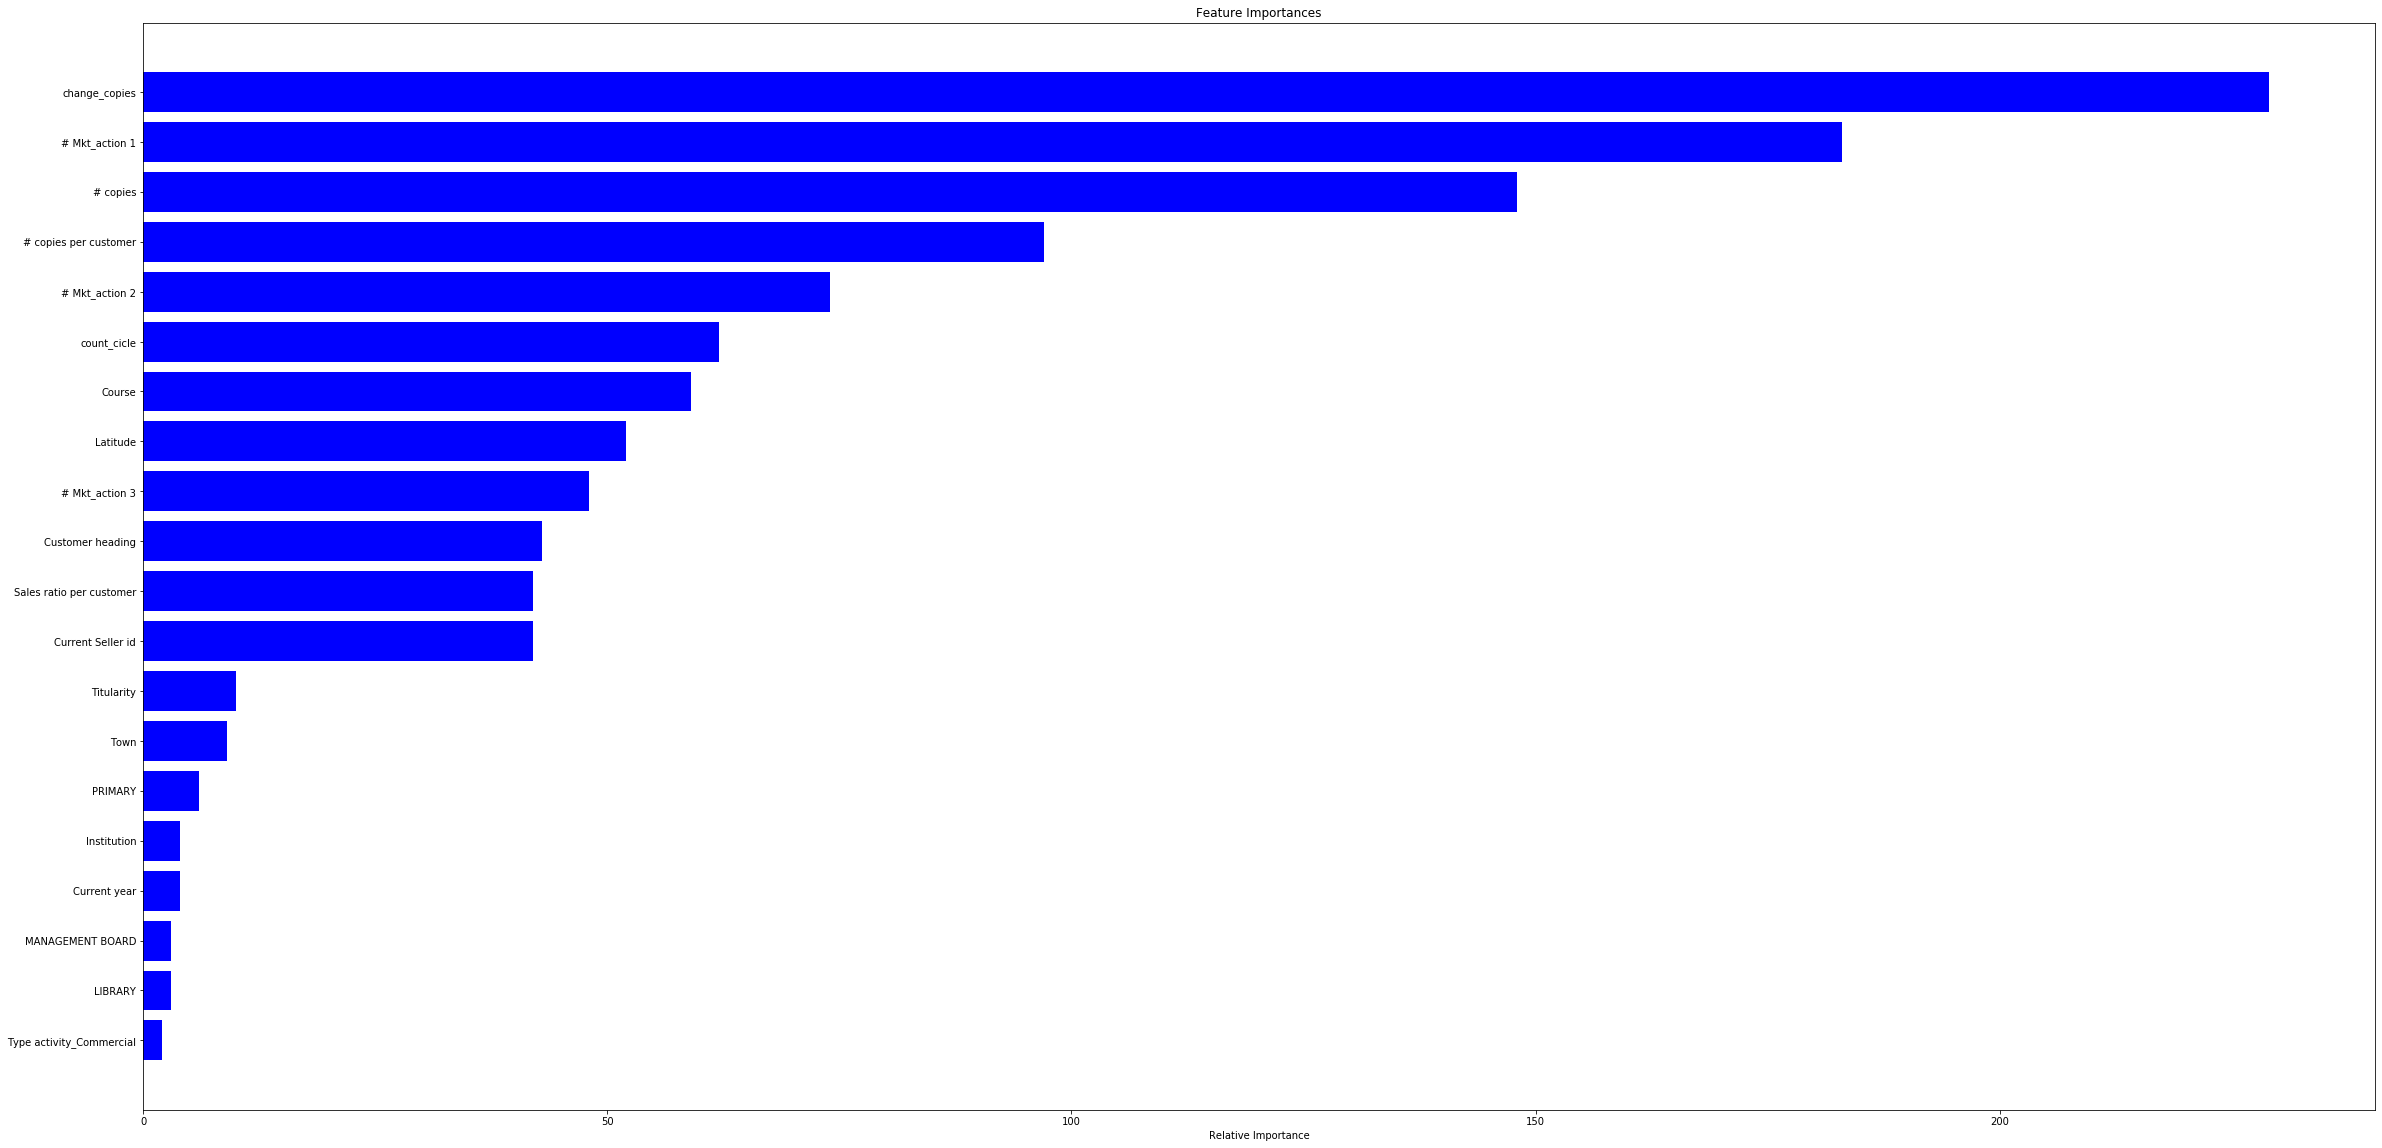

In [2142]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 15

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2143]:
train = subj_15[(subj_15['Current year'] == 2015) |(subj_15['Current year'] == 2016) | (subj_15['Current year'] == 2017)]
test = subj_15[(subj_15['Current year'] == 2018)]

In [2144]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2145]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 10}
              precision    recall  f1-score   support

     class_0       0.73      0.86      0.79       534
     class_1       0.78      0.62      0.69       443

    accuracy                           0.75       977
   macro avg       0.76      0.74      0.74       977
weighted avg       0.75      0.75      0.74       977


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           458            76
class_1           169           274
Accuracy_score on the test data:
0.7492323439099283


In [2034]:
import lightgbm as lgb

In [2146]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=10).fit(X_train, y_train)

In [2147]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(192, 'change_copies'), (140, '# copies'), (101, 'Customer heading'), (64, '# Mkt_action 1'), (63, 'Current year'), (55, '# copies per customer'), (51, '# Mkt_action 2'), (27, 'count_cicle'), (22, 'Course'), (19, 'Titularity'), (15, 'Sales ratio per customer'), (10, 'Current Seller id'), (9, 'PRIMARY'), (9, '# Mkt_action 3'), (8, 'Latitude'), (3, 'MANAGEMENT BOARD'), (2, 'Town'), (2, 'MATHEMATICS'), (1, 'Type activity_Commercial'), (1, 'BIOLOGY AND GEOLOGY'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRI

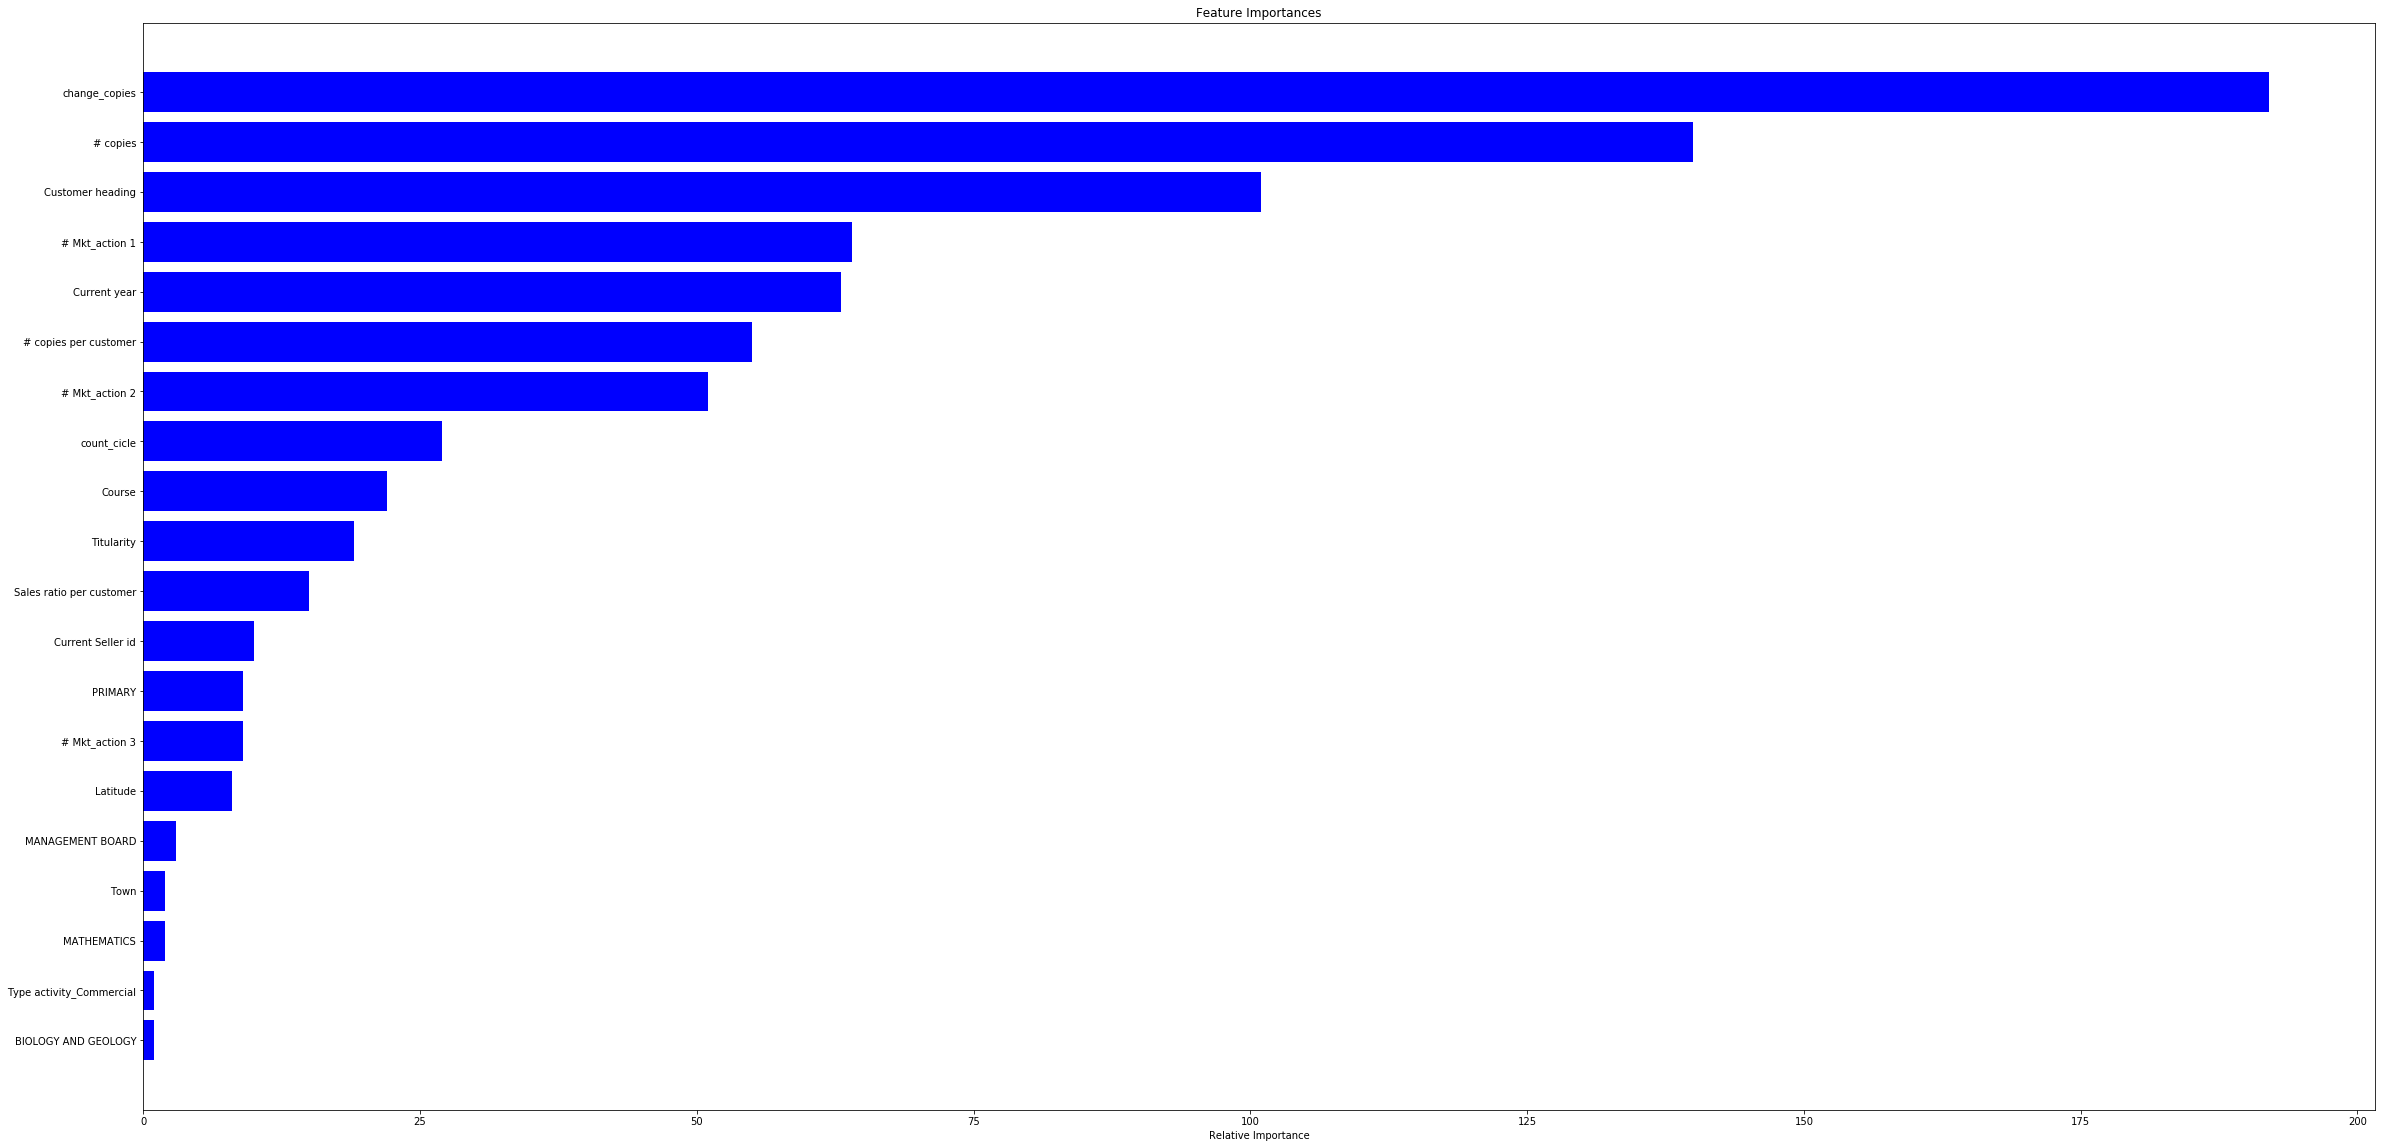

In [2148]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 13

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [61]:
train = subj_13[(subj_13['Current year'] == 2015) |(subj_13['Current year'] == 2016) | (subj_13['Current year'] == 2017)]
test = subj_13[(subj_13['Current year'] == 2018)]

In [62]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0}
              precision    recall  f1-score   support

     class_0       0.73      0.88      0.80       425
     class_1       0.84      0.65      0.73       390

    accuracy                           0.77       815
   macro avg       0.78      0.77      0.77       815
weighted avg       0.78      0.77      0.77       815


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0           375            50
class_1           136           254
Accuracy_score on the test data:
0.7717791411042945
Roc auc on the test data:
0.7668174962292609


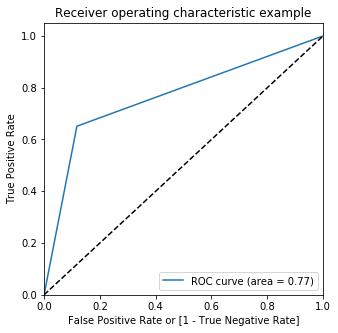

In [66]:
estimator = lgb.LGBMClassifier()
plt.rcParams.update({'font.size': 10})

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [2034]:
import lightgbm as lgb

In [67]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=0).fit(X_train, y_train)

In [68]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(177, 'change_copies'), (94, 'deadline_end_month'), (93, 'Latitude'), (81, '# copies'), (62, 'days_dif_deadline_end'), (57, 'action_during_deadline'), (45, 'course_end_day'), (43, 'Mkt_impact'), (39, '# copies per customer'), (38, 'deadline_end_day'), (35, 'deadline_start_day'), (18, 'days_dif_deadline_start'), (14, 'Mkt_actions'), (13, '# Mkt_action 1'), (12, 'MANAGEMENT BOARD'), (12, 'Course'), (12, '# Mkt_action 2'), (10, 'deadline_start_month'), (8, '# Mkt_action 3'), (6, 'course_end_month'), (2, 'Type activity_Commercial'), (1, 'Town'), (0, 'visits'), (0, 'days_dif_course_start'), (0, 'days_dif_course_end'), (0, 'course_start_month'), (0, 'count_cicle'), (0, 'action_during_class'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_C

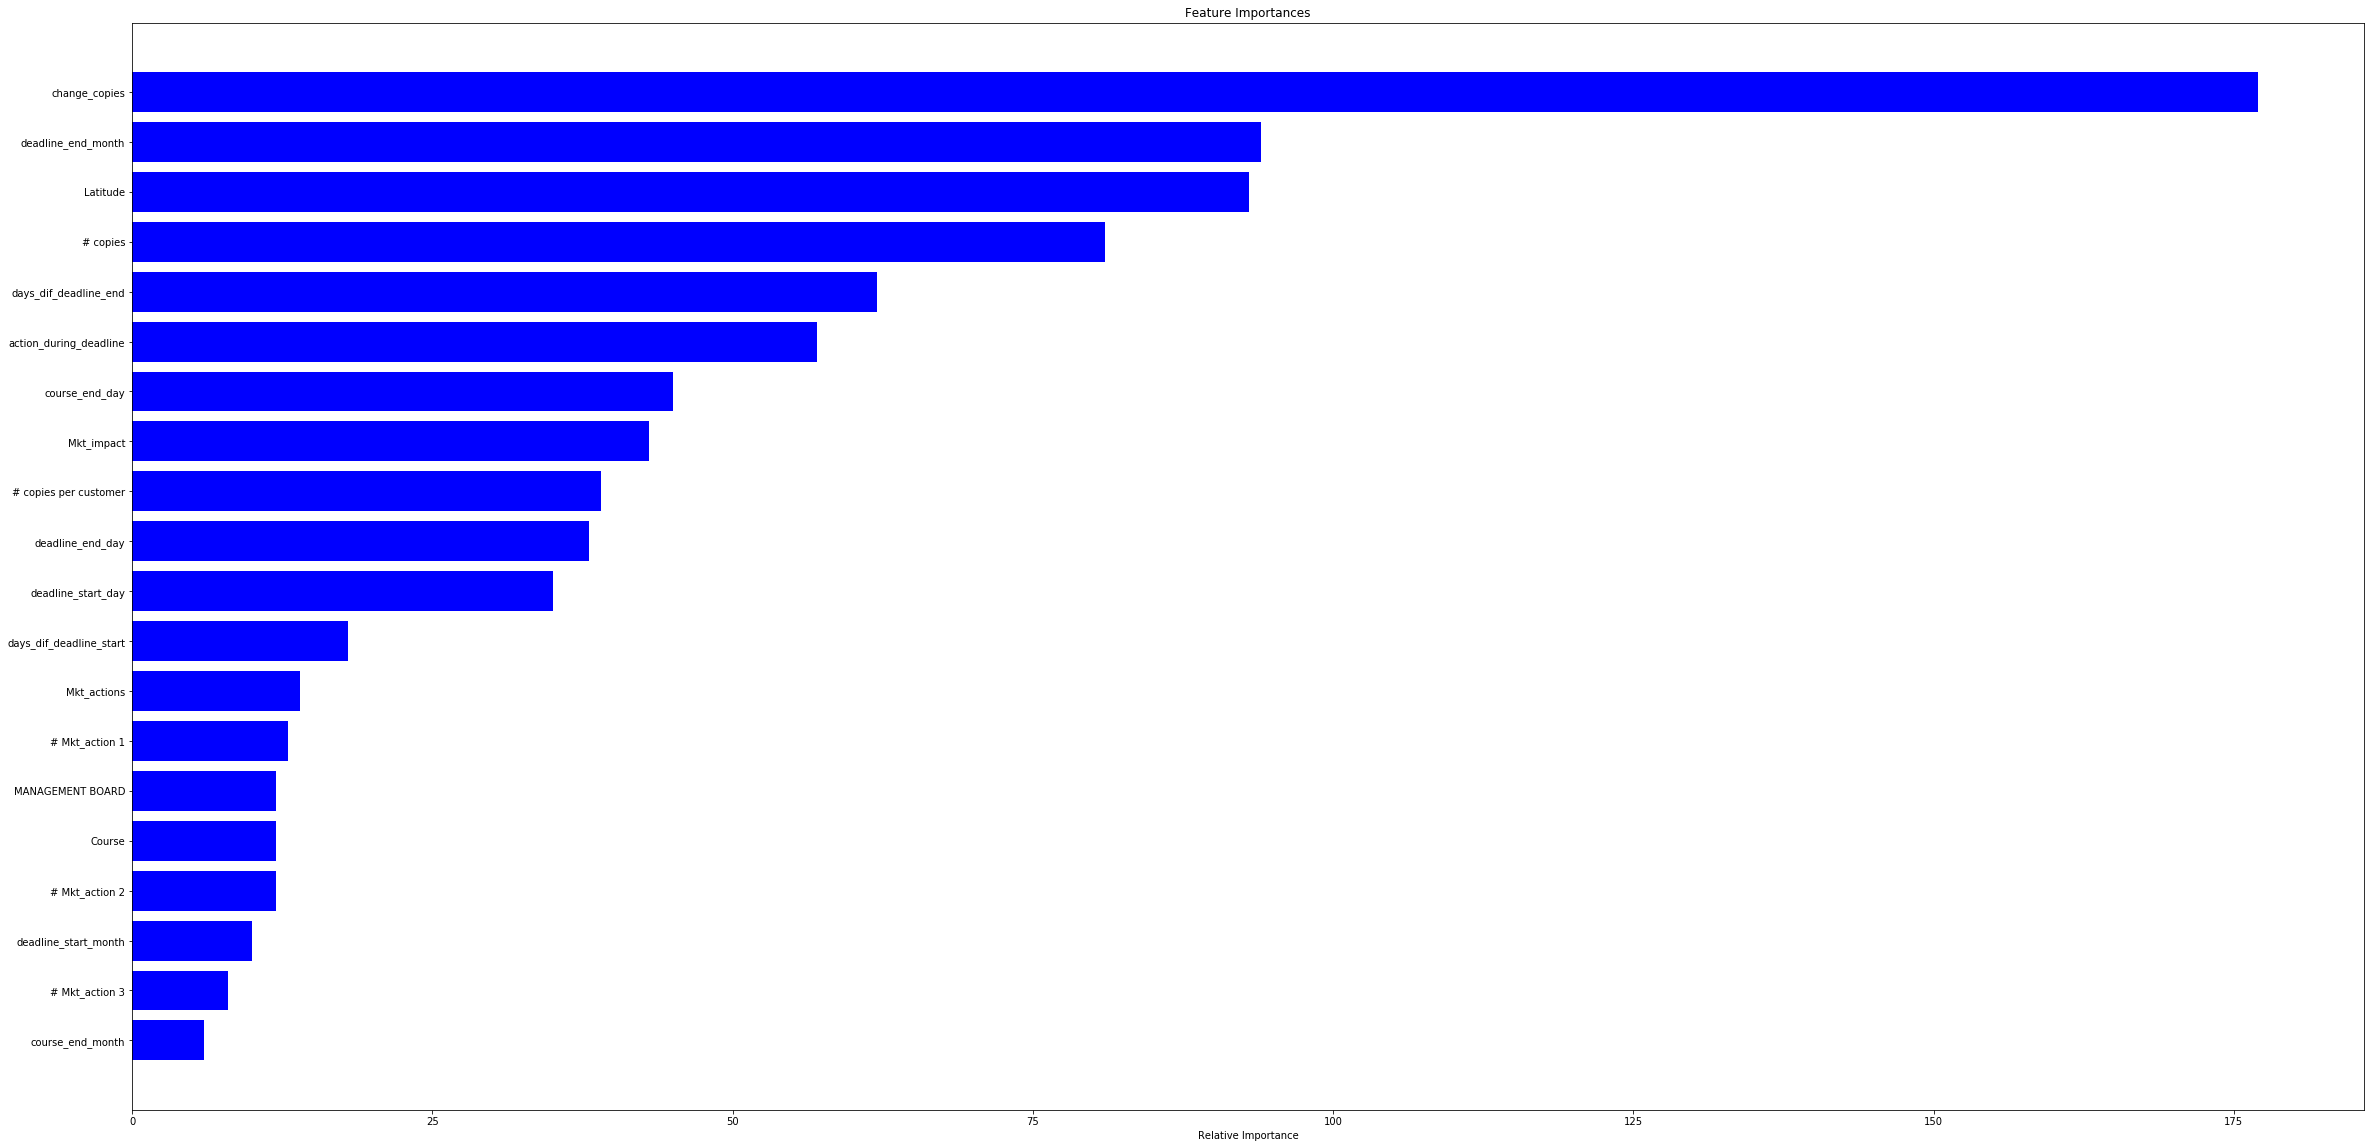

In [69]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## end of models per subject

In [1910]:
train.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer'],
      dtype='object')

In [1910]:
train.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer'],
      dtype='object')

In [1855]:
grid_search_forest.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [1858]:
accuracy_score(y_test,grid_search_forest.best_estimator_.predict(X_prep_test))

0.7559704002690885

In [1857]:
X_test, y_test = test.drop(["churn"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_prep_test = transformation_pipeline.fit_transform(X_test)



In [ ]:
X_prep_test = transformation_pipeline.fit_transform(X)

In [1664]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19697 entries, 0 to 19696
Data columns (total 18 columns):
Course                      19697 non-null int64
Customer heading            19697 non-null float64
Subject                     19697 non-null int64
# copies                    19697 non-null int64
Type Current Support        19697 non-null int64
Current year                19697 non-null int64
Latitude                    19697 non-null float64
Longitude                   19697 non-null float64
Town                        19697 non-null category
Current Seller id           19697 non-null float64
Institution                 19697 non-null category
Titularity                  19697 non-null category
key                         19697 non-null category
change_copies               19697 non-null float64
total_visits                19697 non-null float64
Numer_of_Representatives    19697 non-null int64
Sales ratio per customer    19697 non-null float64
# copies per customer       1969

## Predicting for 2020

In [78]:
full_data.head()

,Course,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,...,days_dif_course_end,days_dif_course_start,days_dif_deadline_end,days_dif_deadline_start,deadline_end_day,deadline_end_month,deadline_start_day,deadline_start_month,visits,Number_of_Representatives
0,29,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,...,86.958904,86.958904,-0.824408,66.948941,18.82939,4.215442,4.273973,2.460772,5.0,3
1,30,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,...,86.958904,86.958904,-0.824408,66.948941,18.82939,4.215442,4.273973,2.460772,5.0,3
2,30,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,...,86.958904,86.958904,-0.824408,66.948941,18.82939,4.215442,4.273973,2.460772,5.0,3
3,26,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,...,86.958904,86.958904,-0.824408,66.948941,18.82939,4.215442,4.273973,2.460772,5.0,3
4,30,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,...,86.958904,86.958904,-0.824408,66.948941,18.82939,4.215442,4.273973,2.460772,5.0,3


In [79]:
full_data['Current year'].unique()

[2015, 2016, 2017, 2018]
Categories (4, int64): [2015, 2016, 2017, 2018]

In [300]:
survey_2019 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2019Surveys_sample.csv", sep = ";")

In [84]:
survey_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554739 entries, 0 to 554738
Data columns (total 9 columns):
Year                    554739 non-null int64
Course                  554739 non-null int64
Subject                 554739 non-null int64
Educational material    554739 non-null int64
Language                554739 non-null int64
Type Current Support    554739 non-null int64
# copies                554739 non-null int64
Publishing group        554585 non-null object
Customer heading        552577 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 38.1+ MB


In [83]:
survey_2019

,Year,Course,Subject,Educational material,Language,Type Current Support,# copies,Publishing group,Customer heading
0,2019,29,53,3,26,1,18,25,113958.0
1,2019,29,65,3,26,1,18,25,113958.0
2,2019,29,60,1,26,1,18,25,113958.0
3,2019,29,54,1,13,1,18,25,113958.0
4,2019,26,48,1,13,1,27,28,113958.0


In [85]:
survey_2018 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2018Surveys_sample.csv", sep = ";")

In [301]:
survey_2019['change copies'] = survey_2019['# copies'] - survey_2018['# copies']

In [310]:
survey_2019 = survey_2019.rename(columns={'Educational material': 'Educational Material'})

In [304]:
survey_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552577 entries, 0 to 553091
Data columns (total 10 columns):
Year                    552577 non-null int64
Course                  552577 non-null int64
Subject                 552577 non-null int64
Educational material    552577 non-null int64
Language                552577 non-null int64
Type Current Support    552577 non-null int64
# copies                552577 non-null int64
Publishing group        552577 non-null category
Customer heading        552577 non-null float64
change copies           552577 non-null float64
dtypes: category(1), float64(2), int64(7)
memory usage: 42.7 MB


In [311]:
survey_2019["Publishing group"] = survey_2019["Publishing group"].apply(lambda x: str(x))
survey_2019 = survey_2019.dropna()

In [312]:
survey_2019["Publishing group"] = survey_2019["Publishing group"].astype("category")

In [313]:
# Filtering out necessary subjects and courses
course_subject = survey_2019[(survey_2019['Subject'] == 13) | (survey_2019['Subject'] == 15) | (survey_2019['Subject'] == 54) | (survey_2019['Subject'] == 60) |
(survey_2019['Subject'] == 65) | (survey_2019['Subject'] == 79)]

In [314]:
# Filtering madrid school

school = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/School locations.xlsx", 'schools')
school_madrid = school[(school.Province == 'Madrid') | (school.Province == 'MADRID') | (school.Province == 'Madrid (Comunidad de Madrid)') |
(school.Region == 'Madrid') | (school.Town == 'Madrid') | (school.Town == 'MADRID') ]

In [315]:
#Filtering out non basic educational materials
survey_school = pd.merge(course_subject, school_madrid, how = 'inner', on = 'Customer heading')
survey_school = survey_school[survey_school["Educational Material"] == 1]

In [316]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26696 entries, 0 to 30767
Data columns (total 18 columns):
Year                    26696 non-null int64
Course                  26696 non-null int64
Subject                 26696 non-null int64
Educational Material    26696 non-null int64
Language                26696 non-null int64
Type Current Support    26696 non-null int64
# copies                26696 non-null int64
Publishing group        26696 non-null category
Customer heading        26696 non-null float64
change copies           26696 non-null float64
Latitude                26696 non-null float64
Longitude               26696 non-null float64
Town                    26696 non-null object
Province                26677 non-null object
Region                  26696 non-null object
Current Seller id       26696 non-null float64
Institution             26696 non-null object
Titularity              26696 non-null object
dtypes: category(1), float64(5), int64(7), object(5)
memory usa

In [270]:
all_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity',
  'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support'
       ]] = all_data[['Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity',
          'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support']].astype('category')

In [290]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5278 entries, 0 to 5277
Data columns (total 80 columns):
# copies                             5278 non-null int64
Course                               5278 non-null category
Customer heading                     5278 non-null category
Subject                              5278 non-null category
Type Current Support                 5278 non-null category
Year                                 5278 non-null category
Latitude                             5278 non-null category
Longitude                            5278 non-null category
Town                                 5278 non-null category
Current Seller id                    5278 non-null category
Institution                          5278 non-null category
Titularity                           5278 non-null category
Publishing group_1                   5278 non-null uint8
visits                               5278 non-null float64
Numer_of_Representatives             5278 non-null int64
Sal

In [413]:
all_data.shape

(4763, 85)

In [398]:
prediction_data = all_data.copy()

In [275]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [276]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=500).fit(X_train, y_train)

In [399]:
prediction_data = prediction_data.rename(columns = {'Year':'Current year'})

In [400]:
prediction_data.columns

Index(['Current year', 'Course', 'Subject', 'Educational Material', 'Language',
       'Type Current Support', '# copies', 'Publishing group',
       'Customer heading', 'change copies', 'Latitude', 'Longitude', 'Town',
       'Province', 'Region', 'Current Seller id', 'Institution', 'Titularity',
       'visits', 'Numer_of_Representatives', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY A

In [407]:
prediction_data[['Number_of_Representatives', '# Mkt_action 2', '# Mkt_action 3', '# Mkt_action 1', 'change_copies']] = X[['Number_of_Representatives', 
                                                                    '# Mkt_action 2', '# Mkt_action 3', '# Mkt_action 1', 'change_copies']]

In [408]:
prediction_data = prediction_data[['Course', '# copies', 'Type Current Support', 'Current year',
       'Latitude', 'Longitude', 'Town', 'Current Seller id', 'Institution',
       'Titularity', 'change_copies', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOSOPHY', 'PHYSICS AND CHEMISTRY',
       'PLASTIC COURSE', 'PRIMARY', 'QUALITY', 'REGIONAL LANGUAGE',
       'RELIGION (PRIMARY)', 'SCIENCE', 'SPANISH LANGUAGE', 'TECHNOLOGY',
       'UNALLOCATED', '# Mkt_action 1', '# Mkt_action 2', '# Mkt_action 3',
       'Mkt_actions', 'Mkt_impact', 'action_during_class',
       'action_during_deadline', 'course_end_day', 'course_end_month',
       'course_start_month', 'days_dif_course_end', 'days_dif_course_start',
       'days_dif_deadline_end', 'days_dif_deadline_start', 'deadline_end_day',
       'deadline_end_month', 'deadline_start_day', 'deadline_start_month',
       'visits', 'Number_of_Representatives']]

In [402]:
all_data.columns

Index(['Year', 'Course', 'Subject', 'Educational Material', 'Language',
       'Type Current Support', '# copies', 'Publishing group',
       'Customer heading', 'change copies', 'Latitude', 'Longitude', 'Town',
       'Province', 'Region', 'Current Seller id', 'Institution', 'Titularity',
       'visits', 'Numer_of_Representatives', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTO

In [286]:
X.columns

Index(['Course', '# copies', 'Type Current Support', 'Current year',
       'Latitude', 'Longitude', 'Town', 'Current Seller id', 'Institution',
       'Titularity', 'change_copies', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOSOPHY', 'PHYSICS AND CHEMISTRY',
       'PLASTIC

In [282]:
prediction_data.columns

Index(['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'Publishing group_1',
       'visits', 'Numer_of_Representatives', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN & GREEK', 'LIBRAR

In [409]:
X_prediction = transformation_pipeline.fit_transform(prediction_data)

In [420]:
y_pred_test = model_lgb.predict(X_prediction)

In [428]:
sum(y_pred_test)/len(y_pred_test)

0.47649734647460196